In [7]:
!pip install minigrid
!pip install stable_baselines3
from __future__ import annotations

from minigrid.core.constants import COLOR_NAMES
from minigrid.core.grid import Grid
from minigrid.core.mission import MissionSpace
from minigrid.core.world_object import Door, Goal, Key, Wall
from minigrid.manual_control import ManualControl
from minigrid.minigrid_env import MiniGridEnv
from minigrid.core.actions import Actions
import numpy as np
import random
import os

import minigrid
from minigrid.wrappers import ImgObsWrapper
from gymnasium.core import ObservationWrapper
from stable_baselines3 import PPO
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.callbacks import BaseCallback
from typing import Callable, Dict, List, Optional, Tuple, Type, Union

from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.policies import BasePolicy

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import gymnasium as gym


from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/JHU_DL'

# from plot import make_plot
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pdb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/JHU_DL'
/content/drive/MyDrive/JHU_DL


In [2]:
os.listdir()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['callback_usuage.ipynb',
 'customfeatureextractor.py',
 'New Folder With Items',
 '__pycache__',
 'plot.py',
 'callback.py',
 'model_5x5s_multi_input.zip',
 'model_5x5s_multi_input.png',
 'model_12x12s_multi_input.png',
 'model_8x8s_multi_input.zip',
 'model_8x8s_multi_input.png',
 'customenv.py',
 'revised_reward_multi_input.ipynb',
 'Copy of revised_reward_multi_input.ipynb',
 'training_plot.png']

In [15]:
%matplotlib inline

In [16]:
from customenv import CustomDoorKey

from minigrid.wrappers import ImgObsWrapper
from stable_baselines3 import PPO

from customfeatureextractor import CNNFeaturesExtractor, CustomFeatureExtractor, CustomImgObsWrapper

from callback import CustomRewardCallback
from plot import make_plot

# size is grid size
# intermediate reward determines if picking up key/opening door gives reward
# randomimze goal determines if goal should be randomized (cell on last column)
env = CustomDoorKey(size=5, intermediate_reward=True, randomize_goal=True, render_mode = "rgb")
default_env = ImgObsWrapper(env)
custom_env = CustomImgObsWrapper(env)

In [ ]:
policy_kwargs = dict(
    features_extractor_class=CNNFeaturesExtractor,
    features_extractor_kwargs=dict(features_dim=128, regularization = False),
)

custom_policy_kwargs = dict(
    features_extractor_class=CustomFeatureExtractor,
    features_extractor_kwargs=dict(cnn_features_dim=128, mlp_features_dim=32),
)

max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


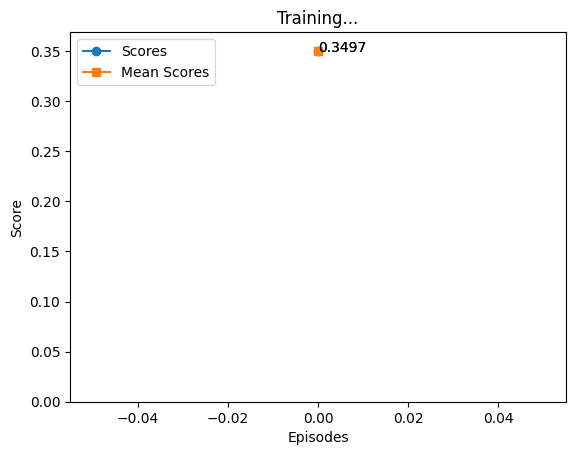

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 605      |
|    ep_rew_mean     | 0.94     |
| time/              |          |
|    fps             | 154      |
|    iterations      | 1        |
|    time_elapsed    | 13       |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 641         |
|    ep_rew_mean          | 0.915       |
| time/                   |             |
|    fps                  | 175         |
|    iterations           | 2           |
|    time_elapsed         | 23          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011732921 |
|    clip_fraction        | 0.0548      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | -2.01       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00976    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00877    |
|    value_loss           | 0.00302     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 608         |
|    ep_rew_mean          | 0.884       |
| time/                   |             |
|    fps                  | 192         |
|    iterations           | 3           |
|    time_elapsed         | 31          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.010250205 |
|    clip_fraction        | 0.095       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.93       |
|    explained_variance   | 0.286       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0176     |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0101     |
|    value_loss           | 0.00392     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 599         |
|    ep_rew_mean          | 0.91        |
| time/                   |             |
|    fps                  | 200         |
|    iterations           | 4           |
|    time_elapsed         | 40          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.010629332 |
|    clip_fraction        | 0.0993      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.91       |
|    explained_variance   | -0.0877     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0168     |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00899    |
|    value_loss           | 0.00341     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 616         |
|    ep_rew_mean          | 0.89        |
| time/                   |             |
|    fps                  | 207         |
|    iterations           | 5           |
|    time_elapsed         | 49          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.011432394 |
|    clip_fraction        | 0.0973      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.9        |
|    explained_variance   | 0.116       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0234     |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 0.00437     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 535      |
|    ep_rew_mean          | 0.971    |
| time/                   |          |
|    fps                  | 210      |
|    iterations           | 6        |
|    time_elapsed         | 58       |
|    total_timesteps      | 12288    |
| train/                  |          |
|    approx_kl            | 0.014279 |
|    clip_fraction        | 0.172    |
|    clip_range           | 0.2      |
|    entropy_loss         | -1.87    |
|    explained_variance   | 0.192    |
|    learning_rate        | 0.0003   |
|    loss                 | -0.0289  |
|    n_updates            | 50       |
|    policy_gradient_loss | -0.0173  |
|    value_loss           | 0.00249  |
--------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 458         |
|    ep_rew_mean          | 1.06        |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 7           |
|    time_elapsed         | 68          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.012553373 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.85       |
|    explained_variance   | 0.182       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0298     |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 0.0115      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 333         |
|    ep_rew_mean          | 1.21        |
| time/                   |             |
|    fps                  | 202         |
|    iterations           | 8           |
|    time_elapsed         | 80          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.012711212 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.81       |
|    explained_variance   | 0.156       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0214     |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 0.0192      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 267         |
|    ep_rew_mean          | 1.28        |
| time/                   |             |
|    fps                  | 197         |
|    iterations           | 9           |
|    time_elapsed         | 93          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.012196608 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.75       |
|    explained_variance   | 0.254       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00714    |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 0.0336      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 209          |
|    ep_rew_mean          | 1.35         |
| time/                   |              |
|    fps                  | 188          |
|    iterations           | 10           |
|    time_elapsed         | 108          |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 0.0141537255 |
|    clip_fraction        | 0.165        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | 0.264        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0059      |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.0205      |
|    value_loss           | 0.0406       |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 116.73 seconds and 21312 steps.
Stopping training as the mean reward 0.9004600048065186 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [18]:
# Setup model and environment
env = CustomDoorKey(size=5, intermediate_reward=True, randomize_goal=True, key_discount=0.1, render_mode="rgb")
env = ImgObsWrapper(env)

model = PPO("MultiInputPolicy", custom_env, policy_kwargs=custom_policy_kwargs, verbose=1)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback

# Train the model
model.learn(total_timesteps=int(2e8), callback=callback)  # apply callback
model.save("model_5x5s_multi_input")

# the plot function also saves the plot
plt.savefig('model_5x5s_multi_input.png')

# Close the environment
env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


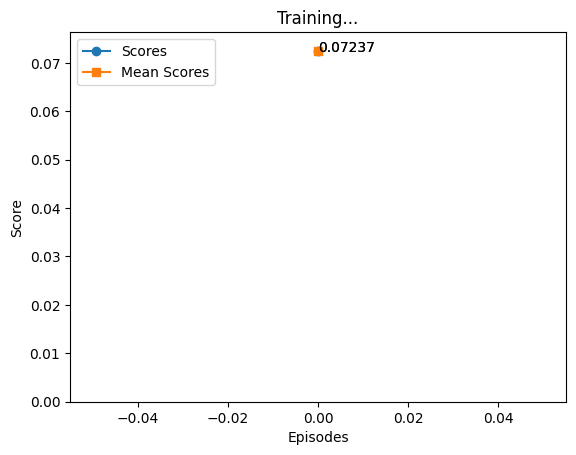

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 0.0846   |
| time/              |          |
|    fps             | 266      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 0.179       |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 2           |
|    time_elapsed         | 15          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011073556 |
|    clip_fraction        | 0.0864      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | -2.82       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.016      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0103     |
|    value_loss           | 0.0017      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 985          |
|    ep_rew_mean          | 0.142        |
| time/                   |              |
|    fps                  | 244          |
|    iterations           | 3            |
|    time_elapsed         | 25           |
|    total_timesteps      | 6144         |
| train/                  |              |
|    approx_kl            | 0.0114054065 |
|    clip_fraction        | 0.11         |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.155        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0143      |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.0131      |
|    value_loss           | 0.000276     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 907          |
|    ep_rew_mean          | 0.31         |
| time/                   |              |
|    fps                  | 236          |
|    iterations           | 4            |
|    time_elapsed         | 34           |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0115393065 |
|    clip_fraction        | 0.109        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.92        |
|    explained_variance   | -0.088       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.02        |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.0143      |
|    value_loss           | 0.000177     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 924         |
|    ep_rew_mean          | 0.267       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 5           |
|    time_elapsed         | 42          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.008461962 |
|    clip_fraction        | 0.0635      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.9        |
|    explained_variance   | 0.0322      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0369     |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00778    |
|    value_loss           | 0.0024      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 898         |
|    ep_rew_mean          | 0.315       |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 6           |
|    time_elapsed         | 51          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.009460144 |
|    clip_fraction        | 0.0992      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.89       |
|    explained_variance   | -0.332      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0322     |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0132     |
|    value_loss           | 0.000448    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 872         |
|    ep_rew_mean          | 0.347       |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 7           |
|    time_elapsed         | 60          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.009099015 |
|    clip_fraction        | 0.0917      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.88       |
|    explained_variance   | 0.622       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0426     |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0131     |
|    value_loss           | 0.00174     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 851        |
|    ep_rew_mean          | 0.386      |
| time/                   |            |
|    fps                  | 235        |
|    iterations           | 8          |
|    time_elapsed         | 69         |
|    total_timesteps      | 16384      |
| train/                  |            |
|    approx_kl            | 0.01006794 |
|    clip_fraction        | 0.0942     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.86      |
|    explained_variance   | 0.44       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00801   |
|    n_updates            | 70         |
|    policy_gradient_loss | -0.0098    |
|    value_loss           | 0.00279    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 865         |
|    ep_rew_mean          | 0.358       |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 9           |
|    time_elapsed         | 79          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.009806424 |
|    clip_fraction        | 0.0808      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.86       |
|    explained_variance   | 0.419       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0421     |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 0.00299     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 858         |
|    ep_rew_mean          | 0.363       |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 10          |
|    time_elapsed         | 87          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.010434197 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.86       |
|    explained_variance   | 0.526       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00884    |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.000497    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 858         |
|    ep_rew_mean          | 0.369       |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 11          |
|    time_elapsed         | 96          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.009460552 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.85       |
|    explained_variance   | 0.366       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0075     |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0112     |
|    value_loss           | 0.00159     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 858         |
|    ep_rew_mean          | 0.367       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 12          |
|    time_elapsed         | 105         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.013900742 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.84       |
|    explained_variance   | 0.517       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.038      |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.00188     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 851         |
|    ep_rew_mean          | 0.373       |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 13          |
|    time_elapsed         | 114         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.011175134 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | 0.425       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00587     |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.013      |
|    value_loss           | 0.000616    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 845         |
|    ep_rew_mean          | 0.38        |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 14          |
|    time_elapsed         | 123         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.011566637 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.425       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00637    |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0102     |
|    value_loss           | 0.00167     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 836         |
|    ep_rew_mean          | 0.391       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 15          |
|    time_elapsed         | 132         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.011159388 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | 0.219       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00384    |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 0.00212     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 834         |
|    ep_rew_mean          | 0.401       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 16          |
|    time_elapsed         | 141         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.013406737 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.0169      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0104     |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 0.00318     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 827         |
|    ep_rew_mean          | 0.408       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 17          |
|    time_elapsed         | 150         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.015990429 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | -0.299      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0423     |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.00164     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 835          |
|    ep_rew_mean          | 0.393        |
| time/                   |              |
|    fps                  | 232          |
|    iterations           | 18           |
|    time_elapsed         | 158          |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0113259945 |
|    clip_fraction        | 0.133        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.72        |
|    explained_variance   | 0.485        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0135      |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.0126      |
|    value_loss           | 0.00123      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 843         |
|    ep_rew_mean          | 0.379       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 19          |
|    time_elapsed         | 167         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.011901124 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.65       |
|    explained_variance   | -0.581      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0106     |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.016      |
|    value_loss           | 0.000283    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 852         |
|    ep_rew_mean          | 0.361       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 20          |
|    time_elapsed         | 175         |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.013707144 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.68       |
|    explained_variance   | -1.47       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0247     |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 0.000156    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 845         |
|    ep_rew_mean          | 0.378       |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 21          |
|    time_elapsed         | 184         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.012189856 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | -0.23       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0166     |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 0.000127    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 831        |
|    ep_rew_mean          | 0.401      |
| time/                   |            |
|    fps                  | 232        |
|    iterations           | 22         |
|    time_elapsed         | 194        |
|    total_timesteps      | 45056      |
| train/                  |            |
|    approx_kl            | 0.01380772 |
|    clip_fraction        | 0.158      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.65      |
|    explained_variance   | 0.103      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0417    |
|    n_updates            | 210        |
|    policy_gradient_loss | -0.0139    |
|    value_loss           | 0.00269    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 828         |
|    ep_rew_mean          | 0.404       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 23          |
|    time_elapsed         | 202         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.013547755 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.477       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0078     |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.00558     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 823         |
|    ep_rew_mean          | 0.411       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 24          |
|    time_elapsed         | 211         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.013614961 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.67       |
|    explained_variance   | 0.531       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0317     |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 0.00147     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 825         |
|    ep_rew_mean          | 0.411       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 25          |
|    time_elapsed         | 220         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.017302664 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.529       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0463     |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 0.00274     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 818         |
|    ep_rew_mean          | 0.417       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 26          |
|    time_elapsed         | 228         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.014898862 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.57       |
|    explained_variance   | 0.397       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0528     |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 0.00181     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 800         |
|    ep_rew_mean          | 0.446       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 27          |
|    time_elapsed         | 238         |
|    total_timesteps      | 55296       |
| train/                  |             |
|    approx_kl            | 0.013532886 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.54       |
|    explained_variance   | 0.206       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0394     |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 0.00161     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 798         |
|    ep_rew_mean          | 0.449       |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 28          |
|    time_elapsed         | 245         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.011638347 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | -0.0422     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00411    |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 0.0127      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 800         |
|    ep_rew_mean          | 0.446       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 29          |
|    time_elapsed         | 255         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.020081013 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_variance   | -0.0672     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00193    |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 0.00276     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 797         |
|    ep_rew_mean          | 0.454       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 30          |
|    time_elapsed         | 264         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.020362314 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | 0.375       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0423     |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 0.00133     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 791         |
|    ep_rew_mean          | 0.462       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 31          |
|    time_elapsed         | 272         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.011145415 |
|    clip_fraction        | 0.124       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.618       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0326     |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 0.00395     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 788         |
|    ep_rew_mean          | 0.465       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 32          |
|    time_elapsed         | 281         |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.017146189 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.51       |
|    explained_variance   | 0.495       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00833     |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 0.0025      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 785         |
|    ep_rew_mean          | 0.469       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 33          |
|    time_elapsed         | 290         |
|    total_timesteps      | 67584       |
| train/                  |             |
|    approx_kl            | 0.011839269 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.47       |
|    explained_variance   | 0.569       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0298     |
|    n_updates            | 320         |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 0.00168     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 782        |
|    ep_rew_mean          | 0.476      |
| time/                   |            |
|    fps                  | 232        |
|    iterations           | 34         |
|    time_elapsed         | 299        |
|    total_timesteps      | 69632      |
| train/                  |            |
|    approx_kl            | 0.01509836 |
|    clip_fraction        | 0.182      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.46      |
|    explained_variance   | 0.47       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0213    |
|    n_updates            | 330        |
|    policy_gradient_loss | -0.0214    |
|    value_loss           | 0.00248    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 787         |
|    ep_rew_mean          | 0.468       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 35          |
|    time_elapsed         | 308         |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.013346622 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.51       |
|    explained_variance   | 0.187       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0272     |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 0.00188     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 787         |
|    ep_rew_mean          | 0.468       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 36          |
|    time_elapsed         | 316         |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.016726794 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | -0.136      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0486     |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.000527    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 788         |
|    ep_rew_mean          | 0.47        |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 37          |
|    time_elapsed         | 327         |
|    total_timesteps      | 75776       |
| train/                  |             |
|    approx_kl            | 0.011877829 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.49       |
|    explained_variance   | 0.353       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0101     |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 0.00208     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 780         |
|    ep_rew_mean          | 0.48        |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 38          |
|    time_elapsed         | 335         |
|    total_timesteps      | 77824       |
| train/                  |             |
|    approx_kl            | 0.018701624 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.731       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0601     |
|    n_updates            | 370         |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 0.000493    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 752         |
|    ep_rew_mean          | 0.524       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 39          |
|    time_elapsed         | 345         |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.015843157 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.189       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0389     |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 0.00529     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 731          |
|    ep_rew_mean          | 0.552        |
| time/                   |              |
|    fps                  | 230          |
|    iterations           | 40           |
|    time_elapsed         | 355          |
|    total_timesteps      | 81920        |
| train/                  |              |
|    approx_kl            | 0.0118363155 |
|    clip_fraction        | 0.148        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.41        |
|    explained_variance   | 0.507        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.021       |
|    n_updates            | 390          |
|    policy_gradient_loss | -0.0142      |
|    value_loss           | 0.00958      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 709         |
|    ep_rew_mean          | 0.583       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 41          |
|    time_elapsed         | 364         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.016395025 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.553       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0206     |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 0.00523     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 708         |
|    ep_rew_mean          | 0.581       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 42          |
|    time_elapsed         | 373         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.015902728 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | 0.473       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.061      |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 0.00634     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 708        |
|    ep_rew_mean          | 0.585      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 43         |
|    time_elapsed         | 382        |
|    total_timesteps      | 88064      |
| train/                  |            |
|    approx_kl            | 0.01797828 |
|    clip_fraction        | 0.177      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.31      |
|    explained_variance   | 0.46       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0128     |
|    n_updates            | 420        |
|    policy_gradient_loss | -0.0185    |
|    value_loss           | 0.00331    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 691        |
|    ep_rew_mean          | 0.611      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 44         |
|    time_elapsed         | 391        |
|    total_timesteps      | 90112      |
| train/                  |            |
|    approx_kl            | 0.02079387 |
|    clip_fraction        | 0.187      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.29      |
|    explained_variance   | 0.474      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.014     |
|    n_updates            | 430        |
|    policy_gradient_loss | -0.0185    |
|    value_loss           | 0.00423    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 682         |
|    ep_rew_mean          | 0.623       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 45          |
|    time_elapsed         | 400         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.013249515 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.342       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.000225   |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.0121     |
|    value_loss           | 0.0075      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 682          |
|    ep_rew_mean          | 0.623        |
| time/                   |              |
|    fps                  | 230          |
|    iterations           | 46           |
|    time_elapsed         | 409          |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0150214415 |
|    clip_fraction        | 0.144        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.17        |
|    explained_variance   | 0.501        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00517      |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.0179      |
|    value_loss           | 0.00369      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 678         |
|    ep_rew_mean          | 0.631       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 47          |
|    time_elapsed         | 418         |
|    total_timesteps      | 96256       |
| train/                  |             |
|    approx_kl            | 0.018947983 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | -0.0198     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0408     |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 0.0011      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 684         |
|    ep_rew_mean          | 0.624       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 48          |
|    time_elapsed         | 427         |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.025558837 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.619       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00233    |
|    n_updates            | 470         |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 0.00265     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 667         |
|    ep_rew_mean          | 0.654       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 49          |
|    time_elapsed         | 435         |
|    total_timesteps      | 100352      |
| train/                  |             |
|    approx_kl            | 0.014255874 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.535       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.046      |
|    n_updates            | 480         |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 0.00217     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 623         |
|    ep_rew_mean          | 0.723       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 50          |
|    time_elapsed         | 446         |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.012151573 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.119       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0362     |
|    n_updates            | 490         |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 0.00436     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 611         |
|    ep_rew_mean          | 0.739       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 51          |
|    time_elapsed         | 455         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.012129635 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.451       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00132    |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 0.00993     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 613       |
|    ep_rew_mean          | 0.735     |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 52        |
|    time_elapsed         | 463       |
|    total_timesteps      | 106496    |
| train/                  |           |
|    approx_kl            | 0.0194774 |
|    clip_fraction        | 0.142     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.12     |
|    explained_variance   | 0.468     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0509   |
|    n_updates            | 510       |
|    policy_gradient_loss | -0.014    |
|    value_loss           | 0.00554   |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 603         |
|    ep_rew_mean          | 0.752       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 53          |
|    time_elapsed         | 473         |
|    total_timesteps      | 108544      |
| train/                  |             |
|    approx_kl            | 0.017869115 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.486       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0429     |
|    n_updates            | 520         |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 0.0043      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 594        |
|    ep_rew_mean          | 0.764      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 54         |
|    time_elapsed         | 482        |
|    total_timesteps      | 110592     |
| train/                  |            |
|    approx_kl            | 0.01726386 |
|    clip_fraction        | 0.155      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.28      |
|    explained_variance   | 0.1        |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0228    |
|    n_updates            | 530        |
|    policy_gradient_loss | -0.0117    |
|    value_loss           | 0.00498    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 595         |
|    ep_rew_mean          | 0.764       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 55          |
|    time_elapsed         | 491         |
|    total_timesteps      | 112640      |
| train/                  |             |
|    approx_kl            | 0.019313978 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.154       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.024      |
|    n_updates            | 540         |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 0.00656     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 592         |
|    ep_rew_mean          | 0.768       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 56          |
|    time_elapsed         | 500         |
|    total_timesteps      | 114688      |
| train/                  |             |
|    approx_kl            | 0.013499584 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.223       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0203     |
|    n_updates            | 550         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.00347     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 590         |
|    ep_rew_mean          | 0.767       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 57          |
|    time_elapsed         | 509         |
|    total_timesteps      | 116736      |
| train/                  |             |
|    approx_kl            | 0.017606717 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.195       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00432     |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.00226     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 542        |
|    ep_rew_mean          | 0.839      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 58         |
|    time_elapsed         | 520        |
|    total_timesteps      | 118784     |
| train/                  |            |
|    approx_kl            | 0.02103705 |
|    clip_fraction        | 0.217      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.41      |
|    explained_variance   | 0.313      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0395    |
|    n_updates            | 570        |
|    policy_gradient_loss | -0.0258    |
|    value_loss           | 0.00527    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 522        |
|    ep_rew_mean          | 0.87       |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 59         |
|    time_elapsed         | 530        |
|    total_timesteps      | 120832     |
| train/                  |            |
|    approx_kl            | 0.02201797 |
|    clip_fraction        | 0.215      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.21      |
|    explained_variance   | 0.336      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0599    |
|    n_updates            | 580        |
|    policy_gradient_loss | -0.025     |
|    value_loss           | 0.0161     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 518         |
|    ep_rew_mean          | 0.88        |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 60          |
|    time_elapsed         | 539         |
|    total_timesteps      | 122880      |
| train/                  |             |
|    approx_kl            | 0.024515618 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.54        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0241     |
|    n_updates            | 590         |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 0.0101      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 508         |
|    ep_rew_mean          | 0.898       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 61          |
|    time_elapsed         | 548         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.022141788 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.0779      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.047      |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 0.00695     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 508         |
|    ep_rew_mean          | 0.899       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 62          |
|    time_elapsed         | 557         |
|    total_timesteps      | 126976      |
| train/                  |             |
|    approx_kl            | 0.013078682 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.163       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0489     |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.00738     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 0.915       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 63          |
|    time_elapsed         | 565         |
|    total_timesteps      | 129024      |
| train/                  |             |
|    approx_kl            | 0.018770676 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.315       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0493     |
|    n_updates            | 620         |
|    policy_gradient_loss | -0.0224     |
|    value_loss           | 0.00388     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 499        |
|    ep_rew_mean          | 0.914      |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 64         |
|    time_elapsed         | 576        |
|    total_timesteps      | 131072     |
| train/                  |            |
|    approx_kl            | 0.02023023 |
|    clip_fraction        | 0.195      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.39      |
|    explained_variance   | -0.0699    |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0123     |
|    n_updates            | 630        |
|    policy_gradient_loss | -0.0172    |
|    value_loss           | 0.00382    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 450         |
|    ep_rew_mean          | 0.988       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 65          |
|    time_elapsed         | 587         |
|    total_timesteps      | 133120      |
| train/                  |             |
|    approx_kl            | 0.017375432 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.334       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0148     |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 0.0112      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 451         |
|    ep_rew_mean          | 0.99        |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 66          |
|    time_elapsed         | 596         |
|    total_timesteps      | 135168      |
| train/                  |             |
|    approx_kl            | 0.018216956 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.376       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0234     |
|    n_updates            | 650         |
|    policy_gradient_loss | -0.0252     |
|    value_loss           | 0.0162      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 453         |
|    ep_rew_mean          | 0.988       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 67          |
|    time_elapsed         | 605         |
|    total_timesteps      | 137216      |
| train/                  |             |
|    approx_kl            | 0.016718403 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | -0.0529     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0565     |
|    n_updates            | 660         |
|    policy_gradient_loss | -0.0256     |
|    value_loss           | 0.00426     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 415         |
|    ep_rew_mean          | 1.04        |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 68          |
|    time_elapsed         | 616         |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.018982237 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.279       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0188     |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.00652     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 406         |
|    ep_rew_mean          | 1.05        |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 69          |
|    time_elapsed         | 625         |
|    total_timesteps      | 141312      |
| train/                  |             |
|    approx_kl            | 0.023437334 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.211       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.128       |
|    n_updates            | 680         |
|    policy_gradient_loss | -0.0268     |
|    value_loss           | 0.0109      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 422      |
|    ep_rew_mean          | 1.03     |
| time/                   |          |
|    fps                  | 225      |
|    iterations           | 70       |
|    time_elapsed         | 635      |
|    total_timesteps      | 143360   |
| train/                  |          |
|    approx_kl            | 0.018411 |
|    clip_fraction        | 0.207    |
|    clip_range           | 0.2      |
|    entropy_loss         | -1.27    |
|    explained_variance   | 0.632    |
|    learning_rate        | 0.0003   |
|    loss                 | -0.0373  |
|    n_updates            | 690      |
|    policy_gradient_loss | -0.0242  |
|    value_loss           | 0.00622  |
--------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 413         |
|    ep_rew_mean          | 1.05        |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 71          |
|    time_elapsed         | 645         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.020376656 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | -0.0103     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0216     |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.0303     |
|    value_loss           | 0.00559     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 412        |
|    ep_rew_mean          | 1.05       |
| time/                   |            |
|    fps                  | 225        |
|    iterations           | 72         |
|    time_elapsed         | 653        |
|    total_timesteps      | 147456     |
| train/                  |            |
|    approx_kl            | 0.02523249 |
|    clip_fraction        | 0.212      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.08      |
|    explained_variance   | -0.508     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0498    |
|    n_updates            | 710        |
|    policy_gradient_loss | -0.0254    |
|    value_loss           | 0.00877    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 414         |
|    ep_rew_mean          | 1.05        |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 73          |
|    time_elapsed         | 662         |
|    total_timesteps      | 149504      |
| train/                  |             |
|    approx_kl            | 0.017637001 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | -0.153      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0445     |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.0266     |
|    value_loss           | 0.00317     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 406         |
|    ep_rew_mean          | 1.06        |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 74          |
|    time_elapsed         | 673         |
|    total_timesteps      | 151552      |
| train/                  |             |
|    approx_kl            | 0.042311806 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.325       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.000655    |
|    n_updates            | 730         |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 0.00261     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 370         |
|    ep_rew_mean          | 1.11        |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 75          |
|    time_elapsed         | 683         |
|    total_timesteps      | 153600      |
| train/                  |             |
|    approx_kl            | 0.022604173 |
|    clip_fraction        | 0.252       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.303       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.065      |
|    n_updates            | 740         |
|    policy_gradient_loss | -0.0276     |
|    value_loss           | 0.00641     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 379         |
|    ep_rew_mean          | 1.1         |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 76          |
|    time_elapsed         | 692         |
|    total_timesteps      | 155648      |
| train/                  |             |
|    approx_kl            | 0.019380718 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.138       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0452     |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 0.00876     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 391         |
|    ep_rew_mean          | 1.09        |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 77          |
|    time_elapsed         | 702         |
|    total_timesteps      | 157696      |
| train/                  |             |
|    approx_kl            | 0.032750107 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.333       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0216     |
|    n_updates            | 760         |
|    policy_gradient_loss | -0.023      |
|    value_loss           | 0.00798     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 402        |
|    ep_rew_mean          | 1.08       |
| time/                   |            |
|    fps                  | 224        |
|    iterations           | 78         |
|    time_elapsed         | 711        |
|    total_timesteps      | 159744     |
| train/                  |            |
|    approx_kl            | 0.01788956 |
|    clip_fraction        | 0.153      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.953     |
|    explained_variance   | 0.285      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0241    |
|    n_updates            | 770        |
|    policy_gradient_loss | -0.0166    |
|    value_loss           | 0.00524    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 405        |
|    ep_rew_mean          | 1.07       |
| time/                   |            |
|    fps                  | 224        |
|    iterations           | 79         |
|    time_elapsed         | 720        |
|    total_timesteps      | 161792     |
| train/                  |            |
|    approx_kl            | 0.03686735 |
|    clip_fraction        | 0.192      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.01      |
|    explained_variance   | 0.253      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0603    |
|    n_updates            | 780        |
|    policy_gradient_loss | -0.0179    |
|    value_loss           | 0.00426    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.07        |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 80          |
|    time_elapsed         | 729         |
|    total_timesteps      | 163840      |
| train/                  |             |
|    approx_kl            | 0.016364897 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.458       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0297     |
|    n_updates            | 790         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.00251     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 372         |
|    ep_rew_mean          | 1.1         |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 81          |
|    time_elapsed         | 739         |
|    total_timesteps      | 165888      |
| train/                  |             |
|    approx_kl            | 0.022711556 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.318       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0211      |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 0.00488     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 374         |
|    ep_rew_mean          | 1.1         |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 82          |
|    time_elapsed         | 749         |
|    total_timesteps      | 167936      |
| train/                  |             |
|    approx_kl            | 0.039784405 |
|    clip_fraction        | 0.249       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.436       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00566     |
|    n_updates            | 810         |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 0.0151      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 379         |
|    ep_rew_mean          | 1.09        |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 83          |
|    time_elapsed         | 758         |
|    total_timesteps      | 169984      |
| train/                  |             |
|    approx_kl            | 0.025159165 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.566       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0156      |
|    n_updates            | 820         |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 0.0035      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 394         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 84          |
|    time_elapsed         | 767         |
|    total_timesteps      | 172032      |
| train/                  |             |
|    approx_kl            | 0.012832088 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.847      |
|    explained_variance   | 0.69        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.011      |
|    n_updates            | 830         |
|    policy_gradient_loss | -0.0169     |
|    value_loss           | 0.00775     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 411         |
|    ep_rew_mean          | 1.05        |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 85          |
|    time_elapsed         | 777         |
|    total_timesteps      | 174080      |
| train/                  |             |
|    approx_kl            | 0.014623673 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.832      |
|    explained_variance   | 0.473       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0125     |
|    n_updates            | 840         |
|    policy_gradient_loss | -0.0229     |
|    value_loss           | 0.0032      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 426         |
|    ep_rew_mean          | 1.03        |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 86          |
|    time_elapsed         | 787         |
|    total_timesteps      | 176128      |
| train/                  |             |
|    approx_kl            | 0.019537631 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.103       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0216      |
|    n_updates            | 850         |
|    policy_gradient_loss | -0.026      |
|    value_loss           | 0.00575     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 425         |
|    ep_rew_mean          | 1.03        |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 87          |
|    time_elapsed         | 796         |
|    total_timesteps      | 178176      |
| train/                  |             |
|    approx_kl            | 0.011325415 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.878      |
|    explained_variance   | -0.859      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0404     |
|    n_updates            | 860         |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 0.00203     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 414         |
|    ep_rew_mean          | 1.04        |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 88          |
|    time_elapsed         | 807         |
|    total_timesteps      | 180224      |
| train/                  |             |
|    approx_kl            | 0.025026321 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.845      |
|    explained_variance   | 0.237       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0545     |
|    n_updates            | 870         |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 0.00294     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 390         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 89          |
|    time_elapsed         | 818         |
|    total_timesteps      | 182272      |
| train/                  |             |
|    approx_kl            | 0.034503724 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.885      |
|    explained_variance   | 0.165       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.057       |
|    n_updates            | 880         |
|    policy_gradient_loss | -0.0232     |
|    value_loss           | 0.00923     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 341         |
|    ep_rew_mean          | 1.15        |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 90          |
|    time_elapsed         | 829         |
|    total_timesteps      | 184320      |
| train/                  |             |
|    approx_kl            | 0.023765117 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.907      |
|    explained_variance   | 0.324       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0178     |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 0.0163      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 329        |
|    ep_rew_mean          | 1.16       |
| time/                   |            |
|    fps                  | 221        |
|    iterations           | 91         |
|    time_elapsed         | 840        |
|    total_timesteps      | 186368     |
| train/                  |            |
|    approx_kl            | 0.03254156 |
|    clip_fraction        | 0.233      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.826     |
|    explained_variance   | 0.37       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00654   |
|    n_updates            | 900        |
|    policy_gradient_loss | -0.0276    |
|    value_loss           | 0.0201     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 280         |
|    ep_rew_mean          | 1.22        |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 92          |
|    time_elapsed         | 853         |
|    total_timesteps      | 188416      |
| train/                  |             |
|    approx_kl            | 0.023864143 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.854      |
|    explained_variance   | 0.369       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0127     |
|    n_updates            | 910         |
|    policy_gradient_loss | -0.0261     |
|    value_loss           | 0.0182      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 251         |
|    ep_rew_mean          | 1.27        |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 93          |
|    time_elapsed         | 864         |
|    total_timesteps      | 190464      |
| train/                  |             |
|    approx_kl            | 0.030646678 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.84       |
|    explained_variance   | 0.355       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0402     |
|    n_updates            | 920         |
|    policy_gradient_loss | -0.0238     |
|    value_loss           | 0.0226      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 263         |
|    ep_rew_mean          | 1.25        |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 94          |
|    time_elapsed         | 874         |
|    total_timesteps      | 192512      |
| train/                  |             |
|    approx_kl            | 0.029774107 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.748      |
|    explained_variance   | 0.373       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0282     |
|    n_updates            | 930         |
|    policy_gradient_loss | -0.0209     |
|    value_loss           | 0.0127      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 248         |
|    ep_rew_mean          | 1.28        |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 95          |
|    time_elapsed         | 883         |
|    total_timesteps      | 194560      |
| train/                  |             |
|    approx_kl            | 0.026306182 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.8        |
|    explained_variance   | 0.526       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0315     |
|    n_updates            | 940         |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 0.00807     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 214        |
|    ep_rew_mean          | 1.32       |
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 96         |
|    time_elapsed         | 895        |
|    total_timesteps      | 196608     |
| train/                  |            |
|    approx_kl            | 0.02937402 |
|    clip_fraction        | 0.2        |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.781     |
|    explained_variance   | -0.044     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0186    |
|    n_updates            | 950        |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 0.00873    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 187        |
|    ep_rew_mean          | 1.36       |
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 97         |
|    time_elapsed         | 906        |
|    total_timesteps      | 198656     |
| train/                  |            |
|    approx_kl            | 0.03819813 |
|    clip_fraction        | 0.233      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.787     |
|    explained_variance   | 0.386      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0458    |
|    n_updates            | 960        |
|    policy_gradient_loss | -0.0273    |
|    value_loss           | 0.0113     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 198         |
|    ep_rew_mean          | 1.35        |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 98          |
|    time_elapsed         | 916         |
|    total_timesteps      | 200704      |
| train/                  |             |
|    approx_kl            | 0.050570183 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.836      |
|    explained_variance   | 0.256       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00914    |
|    n_updates            | 970         |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 0.0116      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 190        |
|    ep_rew_mean          | 1.36       |
| time/                   |            |
|    fps                  | 218        |
|    iterations           | 99         |
|    time_elapsed         | 928        |
|    total_timesteps      | 202752     |
| train/                  |            |
|    approx_kl            | 0.02316897 |
|    clip_fraction        | 0.128      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.885     |
|    explained_variance   | 0.251      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0308    |
|    n_updates            | 980        |
|    policy_gradient_loss | -0.0153    |
|    value_loss           | 0.00522    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 190       |
|    ep_rew_mean          | 1.36      |
| time/                   |           |
|    fps                  | 217       |
|    iterations           | 100       |
|    time_elapsed         | 940       |
|    total_timesteps      | 204800    |
| train/                  |           |
|    approx_kl            | 0.0223368 |
|    clip_fraction        | 0.182     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.739    |
|    explained_variance   | 0.509     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0123    |
|    n_updates            | 990       |
|    policy_gradient_loss | -0.0135   |
|    value_loss           | 0.0112    |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 184         |
|    ep_rew_mean          | 1.37        |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 101         |
|    time_elapsed         | 952         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.042717863 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.688      |
|    explained_variance   | 0.576       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00806    |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 0.00942     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 181        |
|    ep_rew_mean          | 1.37       |
| time/                   |            |
|    fps                  | 216        |
|    iterations           | 102        |
|    time_elapsed         | 965        |
|    total_timesteps      | 208896     |
| train/                  |            |
|    approx_kl            | 0.03736381 |
|    clip_fraction        | 0.231      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.819     |
|    explained_variance   | 0.565      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0122    |
|    n_updates            | 1010       |
|    policy_gradient_loss | -0.0251    |
|    value_loss           | 0.0111     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 154         |
|    ep_rew_mean          | 1.41        |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 103         |
|    time_elapsed         | 978         |
|    total_timesteps      | 210944      |
| train/                  |             |
|    approx_kl            | 0.031646818 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.724      |
|    explained_variance   | 0.715       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0347     |
|    n_updates            | 1020        |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 0.0107      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 146         |
|    ep_rew_mean          | 1.41        |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 104         |
|    time_elapsed         | 990         |
|    total_timesteps      | 212992      |
| train/                  |             |
|    approx_kl            | 0.022500534 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.65       |
|    explained_variance   | 0.149       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0375     |
|    n_updates            | 1030        |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 0.0151      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 119       |
|    ep_rew_mean          | 1.45      |
| time/                   |           |
|    fps                  | 214       |
|    iterations           | 105       |
|    time_elapsed         | 1004      |
|    total_timesteps      | 215040    |
| train/                  |           |
|    approx_kl            | 0.0215572 |
|    clip_fraction        | 0.131     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.805    |
|    explained_variance   | 0.414     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0184   |
|    n_updates            | 1040      |
|    policy_gradient_loss | -0.016    |
|    value_loss           | 0.00766   |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 1008.24 seconds and 215231 steps.
Stopping training as the mean reward 0.9005299964547158 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [28]:
# Setup model and environment
env = CustomDoorKey(size=8, intermediate_reward=True, randomize_goal=True, key_discount=0.1, render_mode="rgb")
custom_env = CustomImgObsWrapper(env)

model = PPO("MultiInputPolicy", custom_env, policy_kwargs=custom_policy_kwargs, verbose=1)

# Instantiate the callback
max_reward = .9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback

# Train the model
model.learn(total_timesteps=int(2e8), callback=callback)  # apply callback
model.save("model_8x8s_multi_input")

# the plot function also saves the plot
plt.savefig('model_8x8s_multi_input.png')

# Close the environment
env.close()

In [ ]:
# Setup model and environment
env = CustomDoorKey(size=12, intermediate_reward=True, randomize_goal=True, key_discount=0.1, render_mode="rgb")
custom_env = CustomImgObsWrapper(env)

model = PPO("MultiInputPolicy", custom_env, policy_kwargs=custom_policy_kwargs, verbose=1)

# Instantiate the callback
max_reward = .9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback

# Train the model
model.learn(total_timesteps=int(2e8), callback=callback)  # apply callback
model.save("model_12x12s_multi_input")

# the plot function also saves the plot
plt.savefig('model_12x12s_multi_input.png')

# Close the environment
env.close()

## Transfer the model

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


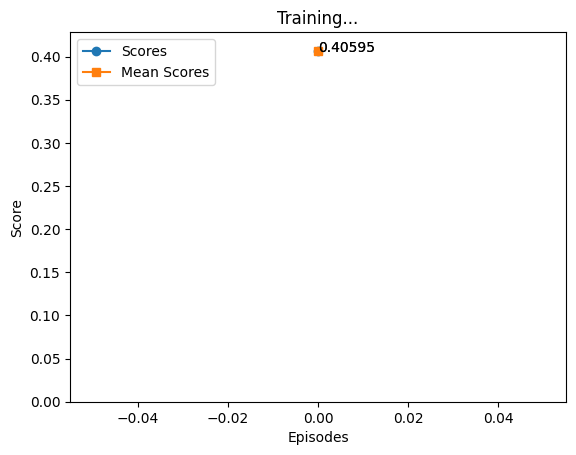

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 460      |
|    ep_rew_mean     | 1.12     |
| time/              |          |
|    fps             | 271      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 676         |
|    ep_rew_mean          | 0.788       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 2           |
|    time_elapsed         | 17          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013668419 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | 0.0535      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0265     |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 0.0055      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 612         |
|    ep_rew_mean          | 0.797       |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 3           |
|    time_elapsed         | 29          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.016708296 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | 0.273       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0133     |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 0.00161     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 581         |
|    ep_rew_mean          | 0.836       |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 4           |
|    time_elapsed         | 38          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.012667389 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | -0.0144     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0354     |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 0.00298     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 553          |
|    ep_rew_mean          | 0.898        |
| time/                   |              |
|    fps                  | 215          |
|    iterations           | 5            |
|    time_elapsed         | 47           |
|    total_timesteps      | 10240        |
| train/                  |              |
|    approx_kl            | 0.0125303725 |
|    clip_fraction        | 0.138        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.59        |
|    explained_variance   | 0.314        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00361      |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.0176      |
|    value_loss           | 0.00295      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 0.964       |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 6           |
|    time_elapsed         | 57          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.012777356 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.353       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0261     |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 0.00315     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 538         |
|    ep_rew_mean          | 0.91        |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 7           |
|    time_elapsed         | 66          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.015935294 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.51       |
|    explained_variance   | 0.408       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.046      |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 0.00711     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 534         |
|    ep_rew_mean          | 0.934       |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 8           |
|    time_elapsed         | 75          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.014365651 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.437       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0171     |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 0.000982    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 539         |
|    ep_rew_mean          | 0.943       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 9           |
|    time_elapsed         | 84          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.013761236 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.54       |
|    explained_variance   | 0.378       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00713    |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.0114     |
|    value_loss           | 0.00384     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 0.999       |
| time/                   |             |
|    fps                  | 213         |
|    iterations           | 10          |
|    time_elapsed         | 95          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.012301452 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.51       |
|    explained_variance   | 0.738       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0297     |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 0.00287     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 478         |
|    ep_rew_mean          | 1.02        |
| time/                   |             |
|    fps                  | 213         |
|    iterations           | 11          |
|    time_elapsed         | 105         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.015599125 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.446       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0232      |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0169     |
|    value_loss           | 0.00663     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 469         |
|    ep_rew_mean          | 1.03        |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 12          |
|    time_elapsed         | 114         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.018216861 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.47       |
|    explained_variance   | 0.531       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0338     |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 0.00794     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 428         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 13          |
|    time_elapsed         | 126         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.020648148 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.146       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0235     |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 0.00678     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 407         |
|    ep_rew_mean          | 1.1         |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 14          |
|    time_elapsed         | 136         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.015938375 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.563       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0368     |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 0.00856     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 403         |
|    ep_rew_mean          | 1.1         |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 15          |
|    time_elapsed         | 145         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.019737002 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.562       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0125     |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 0.00942     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 357        |
|    ep_rew_mean          | 1.16       |
| time/                   |            |
|    fps                  | 207        |
|    iterations           | 16         |
|    time_elapsed         | 157        |
|    total_timesteps      | 32768      |
| train/                  |            |
|    approx_kl            | 0.01173557 |
|    clip_fraction        | 0.141      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.38      |
|    explained_variance   | 0.61       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0112    |
|    n_updates            | 250        |
|    policy_gradient_loss | -0.0112    |
|    value_loss           | 0.00512    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 355         |
|    ep_rew_mean          | 1.16        |
| time/                   |             |
|    fps                  | 207         |
|    iterations           | 17          |
|    time_elapsed         | 168         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.016769756 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.53        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0109     |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.0128      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 280         |
|    ep_rew_mean          | 1.25        |
| time/                   |             |
|    fps                  | 203         |
|    iterations           | 18          |
|    time_elapsed         | 181         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.015815299 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.688       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00255     |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 0.00887     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 197         |
|    ep_rew_mean          | 1.34        |
| time/                   |             |
|    fps                  | 199         |
|    iterations           | 19          |
|    time_elapsed         | 194         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.012135003 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.603       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00666    |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 0.0208      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 168         |
|    ep_rew_mean          | 1.38        |
| time/                   |             |
|    fps                  | 199         |
|    iterations           | 20          |
|    time_elapsed         | 205         |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.016493054 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.671       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0428     |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 0.0217      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 157        |
|    ep_rew_mean          | 1.38       |
| time/                   |            |
|    fps                  | 197        |
|    iterations           | 21         |
|    time_elapsed         | 218        |
|    total_timesteps      | 43008      |
| train/                  |            |
|    approx_kl            | 0.01629673 |
|    clip_fraction        | 0.178      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.25      |
|    explained_variance   | 0.567      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0047    |
|    n_updates            | 300        |
|    policy_gradient_loss | -0.0138    |
|    value_loss           | 0.0103     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 161        |
|    ep_rew_mean          | 1.38       |
| time/                   |            |
|    fps                  | 198        |
|    iterations           | 22         |
|    time_elapsed         | 227        |
|    total_timesteps      | 45056      |
| train/                  |            |
|    approx_kl            | 0.01958694 |
|    clip_fraction        | 0.193      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.17      |
|    explained_variance   | 0.721      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0209    |
|    n_updates            | 310        |
|    policy_gradient_loss | -0.0102    |
|    value_loss           | 0.0143     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 150         |
|    ep_rew_mean          | 1.39        |
| time/                   |             |
|    fps                  | 196         |
|    iterations           | 23          |
|    time_elapsed         | 239         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.019390214 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.514       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0188     |
|    n_updates            | 320         |
|    policy_gradient_loss | -0.00645    |
|    value_loss           | 0.00159     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 141         |
|    ep_rew_mean          | 1.4         |
| time/                   |             |
|    fps                  | 195         |
|    iterations           | 24          |
|    time_elapsed         | 252         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.023477666 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.66        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00694     |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 0.0153      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 145         |
|    ep_rew_mean          | 1.39        |
| time/                   |             |
|    fps                  | 193         |
|    iterations           | 25          |
|    time_elapsed         | 264         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.016606957 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.683       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0593     |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.0123     |
|    value_loss           | 0.00986     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 127         |
|    ep_rew_mean          | 1.42        |
| time/                   |             |
|    fps                  | 189         |
|    iterations           | 26          |
|    time_elapsed         | 280         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.020490626 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.74        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0128     |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.0103     |
|    value_loss           | 0.0157      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 291.07 seconds and 54557 steps.
Stopping training as the mean reward 0.9024740029871464 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [24]:
env = CustomDoorKey(size=8,  render_mode="rgb_array")
env = CustomImgObsWrapper(env)
model = PPO.load("model_5x5s_multi_input", env=env)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)

# Train the model
model.learn(total_timesteps=int(2e6), callback=callback)
model.save("transfered_from_5_to_8")

# Optionally save the final plot
plt.savefig('transfered_from_5_to_8.png')

# Close the environment
env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


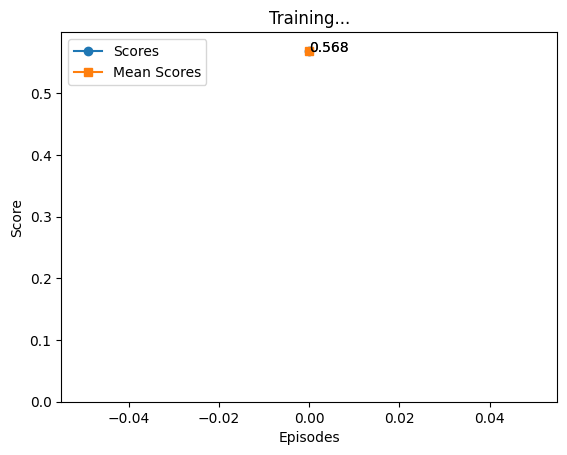

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 740      |
|    ep_rew_mean     | 0.537    |
| time/              |          |
|    fps             | 284      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 870         |
|    ep_rew_mean          | 0.371       |
| time/                   |             |
|    fps                  | 268         |
|    iterations           | 2           |
|    time_elapsed         | 15          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.019407893 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | -0.218      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0321     |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 0.00463     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 913        |
|    ep_rew_mean          | 0.27       |
| time/                   |            |
|    fps                  | 253        |
|    iterations           | 3          |
|    time_elapsed         | 24         |
|    total_timesteps      | 6144       |
| train/                  |            |
|    approx_kl            | 0.01838096 |
|    clip_fraction        | 0.212      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.58      |
|    explained_variance   | -0.0674    |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0165    |
|    n_updates            | 120        |
|    policy_gradient_loss | -0.0253    |
|    value_loss           | 0.00221    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 922         |
|    ep_rew_mean          | 0.297       |
| time/                   |             |
|    fps                  | 249         |
|    iterations           | 4           |
|    time_elapsed         | 32          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.012366541 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.63       |
|    explained_variance   | 0.275       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0532     |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 0.00113     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 938         |
|    ep_rew_mean          | 0.257       |
| time/                   |             |
|    fps                  | 248         |
|    iterations           | 5           |
|    time_elapsed         | 41          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.020403694 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.224       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0353     |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 0.000556    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 948         |
|    ep_rew_mean          | 0.259       |
| time/                   |             |
|    fps                  | 244         |
|    iterations           | 6           |
|    time_elapsed         | 50          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.017952006 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | -2.65       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00832    |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 0.000453    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 955        |
|    ep_rew_mean          | 0.223      |
| time/                   |            |
|    fps                  | 246        |
|    iterations           | 7          |
|    time_elapsed         | 58         |
|    total_timesteps      | 14336      |
| train/                  |            |
|    approx_kl            | 0.01551076 |
|    clip_fraction        | 0.189      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.61      |
|    explained_variance   | 0.513      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00925   |
|    n_updates            | 160        |
|    policy_gradient_loss | -0.0187    |
|    value_loss           | 0.000642   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 963         |
|    ep_rew_mean          | 0.188       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 8           |
|    time_elapsed         | 67          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.015626457 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.57       |
|    explained_variance   | -1.71       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0305     |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.0128     |
|    value_loss           | 0.000176    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 967         |
|    ep_rew_mean          | 0.173       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 9           |
|    time_elapsed         | 76          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.020398067 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | -0.383      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0461     |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.0161     |
|    value_loss           | 0.000454    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 970         |
|    ep_rew_mean          | 0.161       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 10          |
|    time_elapsed         | 85          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.011241229 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.583       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0309     |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 0.000212    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 953         |
|    ep_rew_mean          | 0.191       |
| time/                   |             |
|    fps                  | 238         |
|    iterations           | 11          |
|    time_elapsed         | 94          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.021813022 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | -2.2        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0501     |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 0.000138    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 956         |
|    ep_rew_mean          | 0.179       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 12          |
|    time_elapsed         | 102         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.013861597 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.61       |
|    explained_variance   | -0.427      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0135      |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 0.000764    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 960        |
|    ep_rew_mean          | 0.172      |
| time/                   |            |
|    fps                  | 237        |
|    iterations           | 13         |
|    time_elapsed         | 112        |
|    total_timesteps      | 26624      |
| train/                  |            |
|    approx_kl            | 0.01874439 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.6       |
|    explained_variance   | -1.51      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0549    |
|    n_updates            | 220        |
|    policy_gradient_loss | -0.0232    |
|    value_loss           | 0.000102   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 962         |
|    ep_rew_mean          | 0.166       |
| time/                   |             |
|    fps                  | 235         |
|    iterations           | 14          |
|    time_elapsed         | 121         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.017289203 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | -0.518      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0233      |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 0.000175    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 965         |
|    ep_rew_mean          | 0.165       |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 15          |
|    time_elapsed         | 129         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.011782601 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | -0.364      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.027      |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 0.00012     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 967         |
|    ep_rew_mean          | 0.158       |
| time/                   |             |
|    fps                  | 235         |
|    iterations           | 16          |
|    time_elapsed         | 139         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.014277484 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 0.683       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0372     |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 0.000188    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | 0.156       |
| time/                   |             |
|    fps                  | 235         |
|    iterations           | 17          |
|    time_elapsed         | 147         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.017635401 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.057       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0385     |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 0.000164    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 971          |
|    ep_rew_mean          | 0.155        |
| time/                   |              |
|    fps                  | 234          |
|    iterations           | 18           |
|    time_elapsed         | 157          |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0104566105 |
|    clip_fraction        | 0.121        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.46        |
|    explained_variance   | 0.295        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0441      |
|    n_updates            | 270          |
|    policy_gradient_loss | -0.0174      |
|    value_loss           | 5.22e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 973         |
|    ep_rew_mean          | 0.166       |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 19          |
|    time_elapsed         | 166         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.017302796 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.48       |
|    explained_variance   | -0.201      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0168     |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.000202    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 974         |
|    ep_rew_mean          | 0.174       |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 20          |
|    time_elapsed         | 174         |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.019733679 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.45       |
|    explained_variance   | 0.13        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0154     |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.000799    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 975        |
|    ep_rew_mean          | 0.175      |
| time/                   |            |
|    fps                  | 233        |
|    iterations           | 21         |
|    time_elapsed         | 184        |
|    total_timesteps      | 43008      |
| train/                  |            |
|    approx_kl            | 0.01501305 |
|    clip_fraction        | 0.168      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.4       |
|    explained_variance   | 0.364      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0397    |
|    n_updates            | 300        |
|    policy_gradient_loss | -0.0148    |
|    value_loss           | 0.000924   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 976        |
|    ep_rew_mean          | 0.18       |
| time/                   |            |
|    fps                  | 233        |
|    iterations           | 22         |
|    time_elapsed         | 193        |
|    total_timesteps      | 45056      |
| train/                  |            |
|    approx_kl            | 0.01661615 |
|    clip_fraction        | 0.16       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.36      |
|    explained_variance   | 0.403      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0221    |
|    n_updates            | 310        |
|    policy_gradient_loss | -0.0181    |
|    value_loss           | 0.000378   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 977         |
|    ep_rew_mean          | 0.173       |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 23          |
|    time_elapsed         | 201         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.014091464 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.31        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0135     |
|    n_updates            | 320         |
|    policy_gradient_loss | -0.00981    |
|    value_loss           | 0.000479    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 0.17        |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 24          |
|    time_elapsed         | 211         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.017030451 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | -1.77       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.041      |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 5.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 965         |
|    ep_rew_mean          | 0.192       |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 25          |
|    time_elapsed         | 219         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.017180704 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | -0.3        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0291     |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 0.000138    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 967         |
|    ep_rew_mean          | 0.194       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 26          |
|    time_elapsed         | 231         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.014299102 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | -0.15       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0153     |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.00917    |
|    value_loss           | 0.00218     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.208       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 27          |
|    time_elapsed         | 239         |
|    total_timesteps      | 55296       |
| train/                  |             |
|    approx_kl            | 0.012956302 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.177       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0147     |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.000472    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 958       |
|    ep_rew_mean          | 0.21      |
| time/                   |           |
|    fps                  | 230       |
|    iterations           | 28        |
|    time_elapsed         | 248       |
|    total_timesteps      | 57344     |
| train/                  |           |
|    approx_kl            | 0.0167331 |
|    clip_fraction        | 0.19      |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.33     |
|    explained_variance   | 0.184     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0203   |
|    n_updates            | 370       |
|    policy_gradient_loss | -0.0131   |
|    value_loss           | 0.00135   |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 940         |
|    ep_rew_mean          | 0.235       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 29          |
|    time_elapsed         | 258         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.020732198 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | -0.523      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.026       |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.0246     |
|    value_loss           | 0.00108     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 942        |
|    ep_rew_mean          | 0.231      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 30         |
|    time_elapsed         | 266        |
|    total_timesteps      | 61440      |
| train/                  |            |
|    approx_kl            | 0.01387568 |
|    clip_fraction        | 0.158      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.26      |
|    explained_variance   | 0.184      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.038     |
|    n_updates            | 390        |
|    policy_gradient_loss | -0.0161    |
|    value_loss           | 0.00252    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 944         |
|    ep_rew_mean          | 0.235       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 31          |
|    time_elapsed         | 275         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.014287775 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | 0.291       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0515     |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 0.000312    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 932         |
|    ep_rew_mean          | 0.256       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 32          |
|    time_elapsed         | 284         |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.014159868 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | -0.367      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00977    |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 0.000791    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 927         |
|    ep_rew_mean          | 0.271       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 33          |
|    time_elapsed         | 293         |
|    total_timesteps      | 67584       |
| train/                  |             |
|    approx_kl            | 0.015627766 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.182       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00211    |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.016      |
|    value_loss           | 0.00272     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 926         |
|    ep_rew_mean          | 0.275       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 34          |
|    time_elapsed         | 302         |
|    total_timesteps      | 69632       |
| train/                  |             |
|    approx_kl            | 0.017570384 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | -0.0168     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0548     |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.0209     |
|    value_loss           | 0.00104     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 918        |
|    ep_rew_mean          | 0.289      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 35         |
|    time_elapsed         | 311        |
|    total_timesteps      | 71680      |
| train/                  |            |
|    approx_kl            | 0.01792023 |
|    clip_fraction        | 0.192      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.19      |
|    explained_variance   | 0.537      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0274    |
|    n_updates            | 440        |
|    policy_gradient_loss | -0.0186    |
|    value_loss           | 0.00119    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 920         |
|    ep_rew_mean          | 0.29        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 36          |
|    time_elapsed         | 320         |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.016786411 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.448       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0226     |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 0.00271     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 922         |
|    ep_rew_mean          | 0.289       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 37          |
|    time_elapsed         | 330         |
|    total_timesteps      | 75776       |
| train/                  |             |
|    approx_kl            | 0.013890481 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.427       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0504     |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 0.000657    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 914         |
|    ep_rew_mean          | 0.3         |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 38          |
|    time_elapsed         | 338         |
|    total_timesteps      | 77824       |
| train/                  |             |
|    approx_kl            | 0.020380594 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.494       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0149     |
|    n_updates            | 470         |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 0.000574    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 908         |
|    ep_rew_mean          | 0.312       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 39          |
|    time_elapsed         | 347         |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.016383963 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.3         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0242     |
|    n_updates            | 480         |
|    policy_gradient_loss | -0.0131     |
|    value_loss           | 0.00179     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 890         |
|    ep_rew_mean          | 0.347       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 40          |
|    time_elapsed         | 357         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.014156921 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.449       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0198     |
|    n_updates            | 490         |
|    policy_gradient_loss | -0.0128     |
|    value_loss           | 0.00296     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 875         |
|    ep_rew_mean          | 0.373       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 41          |
|    time_elapsed         | 365         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.012576444 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.573       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0115     |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 0.00393     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 855         |
|    ep_rew_mean          | 0.406       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 42          |
|    time_elapsed         | 375         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.016738903 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | 0.67        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0199     |
|    n_updates            | 510         |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 0.00431     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 840         |
|    ep_rew_mean          | 0.427       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 43          |
|    time_elapsed         | 384         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.018977435 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.12       |
|    explained_variance   | 0.434       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00228    |
|    n_updates            | 520         |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 0.00728     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 827         |
|    ep_rew_mean          | 0.448       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 44          |
|    time_elapsed         | 394         |
|    total_timesteps      | 90112       |
| train/                  |             |
|    approx_kl            | 0.018326234 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.284       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0359     |
|    n_updates            | 530         |
|    policy_gradient_loss | -0.0217     |
|    value_loss           | 0.00662     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 797         |
|    ep_rew_mean          | 0.494       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 45          |
|    time_elapsed         | 404         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.015580114 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.546       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0391     |
|    n_updates            | 540         |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 0.0051      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 767        |
|    ep_rew_mean          | 0.55       |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 46         |
|    time_elapsed         | 413        |
|    total_timesteps      | 94208      |
| train/                  |            |
|    approx_kl            | 0.02335986 |
|    clip_fraction        | 0.183      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.08      |
|    explained_variance   | 0.357      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0307    |
|    n_updates            | 550        |
|    policy_gradient_loss | -0.0172    |
|    value_loss           | 0.00673    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 752         |
|    ep_rew_mean          | 0.575       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 47          |
|    time_elapsed         | 422         |
|    total_timesteps      | 96256       |
| train/                  |             |
|    approx_kl            | 0.014794115 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.162       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0475     |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0107     |
|    value_loss           | 0.00605     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 742         |
|    ep_rew_mean          | 0.597       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 48          |
|    time_elapsed         | 432         |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.019265572 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.538       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0538     |
|    n_updates            | 570         |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 0.0035      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 701         |
|    ep_rew_mean          | 0.663       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 49          |
|    time_elapsed         | 441         |
|    total_timesteps      | 100352      |
| train/                  |             |
|    approx_kl            | 0.024328254 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.595       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0539     |
|    n_updates            | 580         |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 0.00306     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 655         |
|    ep_rew_mean          | 0.738       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 50          |
|    time_elapsed         | 452         |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.033502135 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.958      |
|    explained_variance   | 0.465       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0274      |
|    n_updates            | 590         |
|    policy_gradient_loss | -0.0135     |
|    value_loss           | 0.00681     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 613       |
|    ep_rew_mean          | 0.79      |
| time/                   |           |
|    fps                  | 225       |
|    iterations           | 51        |
|    time_elapsed         | 462       |
|    total_timesteps      | 104448    |
| train/                  |           |
|    approx_kl            | 0.0367245 |
|    clip_fraction        | 0.206     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.976    |
|    explained_variance   | 0.289     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0271   |
|    n_updates            | 600       |
|    policy_gradient_loss | -0.0172   |
|    value_loss           | 0.0126    |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 532         |
|    ep_rew_mean          | 0.907       |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 52          |
|    time_elapsed         | 473         |
|    total_timesteps      | 106496      |
| train/                  |             |
|    approx_kl            | 0.025243277 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.979      |
|    explained_variance   | 0.6         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0351     |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 0.00524     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 490         |
|    ep_rew_mean          | 0.967       |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 53          |
|    time_elapsed         | 483         |
|    total_timesteps      | 108544      |
| train/                  |             |
|    approx_kl            | 0.021028765 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.94       |
|    explained_variance   | 0.593       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00999     |
|    n_updates            | 620         |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 0.0139      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 456         |
|    ep_rew_mean          | 1.01        |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 54          |
|    time_elapsed         | 493         |
|    total_timesteps      | 110592      |
| train/                  |             |
|    approx_kl            | 0.017078478 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.98       |
|    explained_variance   | 0.719       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0358     |
|    n_updates            | 630         |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.00723     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 389         |
|    ep_rew_mean          | 1.1         |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 55          |
|    time_elapsed         | 504         |
|    total_timesteps      | 112640      |
| train/                  |             |
|    approx_kl            | 0.018979965 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.725       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0323     |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.0103      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 369        |
|    ep_rew_mean          | 1.13       |
| time/                   |            |
|    fps                  | 223        |
|    iterations           | 56         |
|    time_elapsed         | 513        |
|    total_timesteps      | 114688     |
| train/                  |            |
|    approx_kl            | 0.01618994 |
|    clip_fraction        | 0.167      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.951     |
|    explained_variance   | 0.389      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0423    |
|    n_updates            | 650        |
|    policy_gradient_loss | -0.0171    |
|    value_loss           | 0.0126     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 312        |
|    ep_rew_mean          | 1.19       |
| time/                   |            |
|    fps                  | 221        |
|    iterations           | 57         |
|    time_elapsed         | 526        |
|    total_timesteps      | 116736     |
| train/                  |            |
|    approx_kl            | 0.01994627 |
|    clip_fraction        | 0.168      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.943     |
|    explained_variance   | 0.454      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.048     |
|    n_updates            | 660        |
|    policy_gradient_loss | -0.0155    |
|    value_loss           | 0.00589    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 295         |
|    ep_rew_mean          | 1.21        |
| time/                   |             |
|    fps                  | 221         |
|    iterations           | 58          |
|    time_elapsed         | 536         |
|    total_timesteps      | 118784      |
| train/                  |             |
|    approx_kl            | 0.019306201 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.874      |
|    explained_variance   | 0.672       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00908    |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.0169     |
|    value_loss           | 0.0118      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 284         |
|    ep_rew_mean          | 1.23        |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 59          |
|    time_elapsed         | 547         |
|    total_timesteps      | 120832      |
| train/                  |             |
|    approx_kl            | 0.017252667 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.977      |
|    explained_variance   | 0.723       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0522     |
|    n_updates            | 680         |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 0.00626     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 271         |
|    ep_rew_mean          | 1.25        |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 60          |
|    time_elapsed         | 556         |
|    total_timesteps      | 122880      |
| train/                  |             |
|    approx_kl            | 0.021213796 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.877      |
|    explained_variance   | 0.655       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0616     |
|    n_updates            | 690         |
|    policy_gradient_loss | -0.0115     |
|    value_loss           | 0.00851     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 255         |
|    ep_rew_mean          | 1.26        |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 61          |
|    time_elapsed         | 567         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.063668564 |
|    clip_fraction        | 0.286       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.918      |
|    explained_variance   | 0.7         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.028      |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 0.00733     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 243        |
|    ep_rew_mean          | 1.27       |
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 62         |
|    time_elapsed         | 578        |
|    total_timesteps      | 126976     |
| train/                  |            |
|    approx_kl            | 0.02343587 |
|    clip_fraction        | 0.196      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.976     |
|    explained_variance   | 0.723      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.011     |
|    n_updates            | 710        |
|    policy_gradient_loss | -0.0134    |
|    value_loss           | 0.0112     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 239        |
|    ep_rew_mean          | 1.28       |
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 63         |
|    time_elapsed         | 588        |
|    total_timesteps      | 129024     |
| train/                  |            |
|    approx_kl            | 0.02066713 |
|    clip_fraction        | 0.197      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.964     |
|    explained_variance   | 0.516      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0471    |
|    n_updates            | 720        |
|    policy_gradient_loss | -0.0101    |
|    value_loss           | 0.00899    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 249        |
|    ep_rew_mean          | 1.26       |
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 64         |
|    time_elapsed         | 597        |
|    total_timesteps      | 131072     |
| train/                  |            |
|    approx_kl            | 0.05627501 |
|    clip_fraction        | 0.219      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.829     |
|    explained_variance   | 0.817      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0325    |
|    n_updates            | 730        |
|    policy_gradient_loss | -0.0206    |
|    value_loss           | 0.005      |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 249         |
|    ep_rew_mean          | 1.26        |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 65          |
|    time_elapsed         | 608         |
|    total_timesteps      | 133120      |
| train/                  |             |
|    approx_kl            | 0.030418323 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.894      |
|    explained_variance   | 0.749       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0377     |
|    n_updates            | 740         |
|    policy_gradient_loss | -0.0226     |
|    value_loss           | 0.00461     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 262         |
|    ep_rew_mean          | 1.24        |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 66          |
|    time_elapsed         | 618         |
|    total_timesteps      | 135168      |
| train/                  |             |
|    approx_kl            | 0.029809153 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.949      |
|    explained_variance   | 0.771       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00647    |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 0.0058      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 254         |
|    ep_rew_mean          | 1.25        |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 67          |
|    time_elapsed         | 628         |
|    total_timesteps      | 137216      |
| train/                  |             |
|    approx_kl            | 0.023907956 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.754      |
|    explained_variance   | 0.714       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.03       |
|    n_updates            | 760         |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.00695     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 259         |
|    ep_rew_mean          | 1.24        |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 68          |
|    time_elapsed         | 639         |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.021016631 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.706      |
|    explained_variance   | 0.683       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00882     |
|    n_updates            | 770         |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 0.0106      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 263         |
|    ep_rew_mean          | 1.23        |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 69          |
|    time_elapsed         | 650         |
|    total_timesteps      | 141312      |
| train/                  |             |
|    approx_kl            | 0.019048825 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.666      |
|    explained_variance   | 0.808       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.027      |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 0.00706     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 267         |
|    ep_rew_mean          | 1.23        |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 70          |
|    time_elapsed         | 663         |
|    total_timesteps      | 143360      |
| train/                  |             |
|    approx_kl            | 0.021813914 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.665      |
|    explained_variance   | 0.761       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00543    |
|    n_updates            | 790         |
|    policy_gradient_loss | -0.0121     |
|    value_loss           | 0.00676     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 252        |
|    ep_rew_mean          | 1.25       |
| time/                   |            |
|    fps                  | 215        |
|    iterations           | 71         |
|    time_elapsed         | 673        |
|    total_timesteps      | 145408     |
| train/                  |            |
|    approx_kl            | 0.02066513 |
|    clip_fraction        | 0.157      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.6       |
|    explained_variance   | 0.75       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0211    |
|    n_updates            | 800        |
|    policy_gradient_loss | -0.0151    |
|    value_loss           | 0.0148     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 244        |
|    ep_rew_mean          | 1.26       |
| time/                   |            |
|    fps                  | 215        |
|    iterations           | 72         |
|    time_elapsed         | 684        |
|    total_timesteps      | 147456     |
| train/                  |            |
|    approx_kl            | 0.02601561 |
|    clip_fraction        | 0.166      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.619     |
|    explained_variance   | 0.579      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0418    |
|    n_updates            | 810        |
|    policy_gradient_loss | -0.00921   |
|    value_loss           | 0.00916    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 248         |
|    ep_rew_mean          | 1.25        |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 73          |
|    time_elapsed         | 695         |
|    total_timesteps      | 149504      |
| train/                  |             |
|    approx_kl            | 0.071444616 |
|    clip_fraction        | 0.278       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.932      |
|    explained_variance   | -0.743      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0378     |
|    n_updates            | 820         |
|    policy_gradient_loss | 0.00903     |
|    value_loss           | 0.00563     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 253        |
|    ep_rew_mean          | 1.25       |
| time/                   |            |
|    fps                  | 214        |
|    iterations           | 74         |
|    time_elapsed         | 705        |
|    total_timesteps      | 151552     |
| train/                  |            |
|    approx_kl            | 0.03968758 |
|    clip_fraction        | 0.156      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.584     |
|    explained_variance   | 0.518      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0244    |
|    n_updates            | 830        |
|    policy_gradient_loss | -0.0142    |
|    value_loss           | 0.00626    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 249         |
|    ep_rew_mean          | 1.25        |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 75          |
|    time_elapsed         | 714         |
|    total_timesteps      | 153600      |
| train/                  |             |
|    approx_kl            | 0.027449936 |
|    clip_fraction        | 0.124       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.408      |
|    explained_variance   | 0.473       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0598     |
|    n_updates            | 840         |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 0.00894     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 240         |
|    ep_rew_mean          | 1.27        |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 76          |
|    time_elapsed         | 726         |
|    total_timesteps      | 155648      |
| train/                  |             |
|    approx_kl            | 0.037986323 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.696      |
|    explained_variance   | 0.69        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0709     |
|    n_updates            | 850         |
|    policy_gradient_loss | -0.000917   |
|    value_loss           | 0.0046      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 223         |
|    ep_rew_mean          | 1.29        |
| time/                   |             |
|    fps                  | 213         |
|    iterations           | 77          |
|    time_elapsed         | 738         |
|    total_timesteps      | 157696      |
| train/                  |             |
|    approx_kl            | 0.020205181 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.412      |
|    explained_variance   | 0.793       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0303     |
|    n_updates            | 860         |
|    policy_gradient_loss | -0.013      |
|    value_loss           | 0.00947     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 199         |
|    ep_rew_mean          | 1.33        |
| time/                   |             |
|    fps                  | 212         |
|    iterations           | 78          |
|    time_elapsed         | 751         |
|    total_timesteps      | 159744      |
| train/                  |             |
|    approx_kl            | 0.018398149 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.597      |
|    explained_variance   | 0.676       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0204     |
|    n_updates            | 870         |
|    policy_gradient_loss | -0.00936    |
|    value_loss           | 0.0142      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 184        |
|    ep_rew_mean          | 1.35       |
| time/                   |            |
|    fps                  | 211        |
|    iterations           | 79         |
|    time_elapsed         | 764        |
|    total_timesteps      | 161792     |
| train/                  |            |
|    approx_kl            | 0.07611493 |
|    clip_fraction        | 0.277      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.489     |
|    explained_variance   | 0.249      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0322    |
|    n_updates            | 880        |
|    policy_gradient_loss | -0.024     |
|    value_loss           | 0.0122     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 193         |
|    ep_rew_mean          | 1.34        |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 80          |
|    time_elapsed         | 772         |
|    total_timesteps      | 163840      |
| train/                  |             |
|    approx_kl            | 0.024289513 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.438      |
|    explained_variance   | 0.672       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.056      |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.00934    |
|    value_loss           | 0.012       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 201         |
|    ep_rew_mean          | 1.32        |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 81          |
|    time_elapsed         | 783         |
|    total_timesteps      | 165888      |
| train/                  |             |
|    approx_kl            | 0.043977406 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.596      |
|    explained_variance   | 0.766       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0234     |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 0.00356     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 183         |
|    ep_rew_mean          | 1.34        |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 82          |
|    time_elapsed         | 794         |
|    total_timesteps      | 167936      |
| train/                  |             |
|    approx_kl            | 0.029303234 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.488      |
|    explained_variance   | 0.724       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.029      |
|    n_updates            | 910         |
|    policy_gradient_loss | -0.00742    |
|    value_loss           | 0.00641     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 161         |
|    ep_rew_mean          | 1.37        |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 83          |
|    time_elapsed         | 809         |
|    total_timesteps      | 169984      |
| train/                  |             |
|    approx_kl            | 0.022969749 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.553      |
|    explained_variance   | 0.656       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0531     |
|    n_updates            | 920         |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 0.0106      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 161         |
|    ep_rew_mean          | 1.37        |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 84          |
|    time_elapsed         | 819         |
|    total_timesteps      | 172032      |
| train/                  |             |
|    approx_kl            | 0.018793972 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.477      |
|    explained_variance   | 0.649       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0354     |
|    n_updates            | 930         |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 0.0142      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 152        |
|    ep_rew_mean          | 1.39       |
| time/                   |            |
|    fps                  | 208        |
|    iterations           | 85         |
|    time_elapsed         | 833        |
|    total_timesteps      | 174080     |
| train/                  |            |
|    approx_kl            | 0.05221331 |
|    clip_fraction        | 0.152      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.347     |
|    explained_variance   | 0.631      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0333    |
|    n_updates            | 940        |
|    policy_gradient_loss | -0.00166   |
|    value_loss           | 0.00914    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 158         |
|    ep_rew_mean          | 1.38        |
| time/                   |             |
|    fps                  | 208         |
|    iterations           | 86          |
|    time_elapsed         | 845         |
|    total_timesteps      | 176128      |
| train/                  |             |
|    approx_kl            | 0.038250994 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.464      |
|    explained_variance   | 0.689       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.047      |
|    n_updates            | 950         |
|    policy_gradient_loss | -0.026      |
|    value_loss           | 0.0165      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 163         |
|    ep_rew_mean          | 1.37        |
| time/                   |             |
|    fps                  | 208         |
|    iterations           | 87          |
|    time_elapsed         | 856         |
|    total_timesteps      | 178176      |
| train/                  |             |
|    approx_kl            | 0.027419526 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.787      |
|    explained_variance   | 0.0987      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0617     |
|    n_updates            | 960         |
|    policy_gradient_loss | -0.0224     |
|    value_loss           | 0.00701     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 138         |
|    ep_rew_mean          | 1.41        |
| time/                   |             |
|    fps                  | 207         |
|    iterations           | 88          |
|    time_elapsed         | 867         |
|    total_timesteps      | 180224      |
| train/                  |             |
|    approx_kl            | 0.069623075 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.62       |
|    explained_variance   | 0.68        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0326     |
|    n_updates            | 970         |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 0.00599     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 136       |
|    ep_rew_mean          | 1.41      |
| time/                   |           |
|    fps                  | 207       |
|    iterations           | 89        |
|    time_elapsed         | 879       |
|    total_timesteps      | 182272    |
| train/                  |           |
|    approx_kl            | 0.0330128 |
|    clip_fraction        | 0.251     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.907    |
|    explained_variance   | 0.136     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0311    |
|    n_updates            | 980       |
|    policy_gradient_loss | -0.0154   |
|    value_loss           | 0.0046    |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 124         |
|    ep_rew_mean          | 1.43        |
| time/                   |             |
|    fps                  | 206         |
|    iterations           | 90          |
|    time_elapsed         | 894         |
|    total_timesteps      | 184320      |
| train/                  |             |
|    approx_kl            | 0.031633757 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.795      |
|    explained_variance   | 0.5         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0447     |
|    n_updates            | 990         |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 0.00983     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 118        |
|    ep_rew_mean          | 1.44       |
| time/                   |            |
|    fps                  | 204        |
|    iterations           | 91         |
|    time_elapsed         | 909        |
|    total_timesteps      | 186368     |
| train/                  |            |
|    approx_kl            | 0.02895715 |
|    clip_fraction        | 0.15       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.381     |
|    explained_variance   | 0.551      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00543   |
|    n_updates            | 1000       |
|    policy_gradient_loss | -0.0184    |
|    value_loss           | 0.0108     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 916.08 seconds and 186916 steps.
Stopping training as the mean reward 0.9008729977905751 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [25]:
env = CustomDoorKey(size=12,  render_mode="rgb_array")
env = CustomImgObsWrapper(env)
model = PPO.load("model_5x5s_multi_input", env=env)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)

# Train the model
model.learn(total_timesteps=int(2e6), callback=callback)
model.save("transfered_from_5_to_12")

# Optionally save the final plot
plt.savefig('transfered_from_5_to_12.png')

# Close the environment
env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


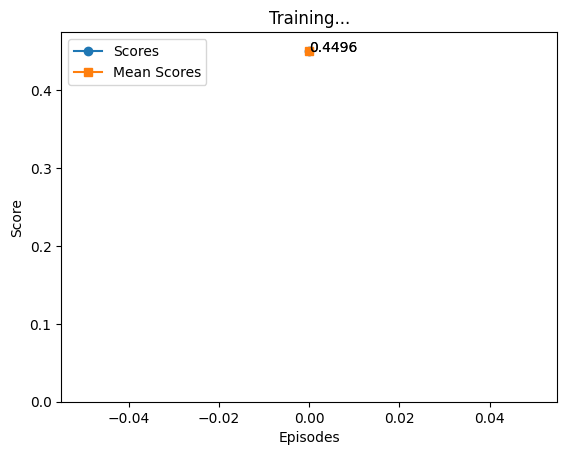

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 0.306    |
| time/              |          |
|    fps             | 272      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 642         |
|    ep_rew_mean          | 0.763       |
| time/                   |             |
|    fps                  | 254         |
|    iterations           | 2           |
|    time_elapsed         | 16          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.024622567 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.46       |
|    explained_variance   | 0.367       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.022      |
|    n_updates            | 1060        |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 0.00208     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 744        |
|    ep_rew_mean          | 0.606      |
| time/                   |            |
|    fps                  | 246        |
|    iterations           | 3          |
|    time_elapsed         | 24         |
|    total_timesteps      | 6144       |
| train/                  |            |
|    approx_kl            | 0.02166183 |
|    clip_fraction        | 0.209      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.763     |
|    explained_variance   | -0.424     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0102    |
|    n_updates            | 1070       |
|    policy_gradient_loss | -0.0219    |
|    value_loss           | 0.00285    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 681         |
|    ep_rew_mean          | 0.7         |
| time/                   |             |
|    fps                  | 237         |
|    iterations           | 4           |
|    time_elapsed         | 34          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.024496727 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.74       |
|    explained_variance   | -0.54       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0497     |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.000678    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 619         |
|    ep_rew_mean          | 0.799       |
| time/                   |             |
|    fps                  | 237         |
|    iterations           | 5           |
|    time_elapsed         | 43          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.029004488 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.72       |
|    explained_variance   | 0.171       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0402     |
|    n_updates            | 1090        |
|    policy_gradient_loss | -0.0297     |
|    value_loss           | 0.00211     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 601         |
|    ep_rew_mean          | 0.849       |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 6           |
|    time_elapsed         | 52          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.021678984 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.708      |
|    explained_variance   | 0.0533      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00539     |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 0.00449     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 568        |
|    ep_rew_mean          | 0.874      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 7          |
|    time_elapsed         | 63         |
|    total_timesteps      | 14336      |
| train/                  |            |
|    approx_kl            | 0.03921016 |
|    clip_fraction        | 0.321      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.755     |
|    explained_variance   | 0.372      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0461    |
|    n_updates            | 1110       |
|    policy_gradient_loss | -0.0247    |
|    value_loss           | 0.00259    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 545         |
|    ep_rew_mean          | 0.902       |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 8           |
|    time_elapsed         | 72          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.029508678 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.73       |
|    explained_variance   | 0.349       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0545     |
|    n_updates            | 1120        |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 0.00409     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 522      |
|    ep_rew_mean          | 0.927    |
| time/                   |          |
|    fps                  | 221      |
|    iterations           | 9        |
|    time_elapsed         | 83       |
|    total_timesteps      | 18432    |
| train/                  |          |
|    approx_kl            | 0.027999 |
|    clip_fraction        | 0.162    |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.638   |
|    explained_variance   | -0.0155  |
|    learning_rate        | 0.0003   |
|    loss                 | -0.0345  |
|    n_updates            | 1130     |
|    policy_gradient_loss | -0.0119  |
|    value_loss           | 0.00571  |
--------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 0.959       |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 10          |
|    time_elapsed         | 92          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.020669512 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.628      |
|    explained_variance   | 0.249       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00544    |
|    n_updates            | 1140        |
|    policy_gradient_loss | -0.00703    |
|    value_loss           | 0.00664     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 512         |
|    ep_rew_mean          | 0.933       |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 11          |
|    time_elapsed         | 102         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.025969155 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.661      |
|    explained_variance   | 0.306       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0308     |
|    n_updates            | 1150        |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 0.00867     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 0.942       |
| time/                   |             |
|    fps                  | 219         |
|    iterations           | 12          |
|    time_elapsed         | 112         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.018110352 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.74       |
|    explained_variance   | 0.0917      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0224     |
|    n_updates            | 1160        |
|    policy_gradient_loss | -0.0025     |
|    value_loss           | 0.00243     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 467         |
|    ep_rew_mean          | 0.984       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 13          |
|    time_elapsed         | 122         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.043820232 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.591      |
|    explained_variance   | 0.342       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0498     |
|    n_updates            | 1170        |
|    policy_gradient_loss | 0.0107      |
|    value_loss           | 0.00808     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 476         |
|    ep_rew_mean          | 0.971       |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 14          |
|    time_elapsed         | 131         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.028559443 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.629      |
|    explained_variance   | 0.384       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0238     |
|    n_updates            | 1180        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 0.00948     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 454         |
|    ep_rew_mean          | 1           |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 15          |
|    time_elapsed         | 142         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.027716108 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.577      |
|    explained_variance   | -0.0472     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0555     |
|    n_updates            | 1190        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.00281     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 458         |
|    ep_rew_mean          | 0.99        |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 16          |
|    time_elapsed         | 151         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.044573277 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.523      |
|    explained_variance   | 0.383       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0586     |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 0.00927     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 460         |
|    ep_rew_mean          | 0.985       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 17          |
|    time_elapsed         | 160         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.040358327 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.651      |
|    explained_variance   | 0.424       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0505     |
|    n_updates            | 1210        |
|    policy_gradient_loss | -0.0158     |
|    value_loss           | 0.00367     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 471         |
|    ep_rew_mean          | 0.969       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 18          |
|    time_elapsed         | 170         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.024374459 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.725      |
|    explained_variance   | 0.516       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0147     |
|    n_updates            | 1220        |
|    policy_gradient_loss | -0.00863    |
|    value_loss           | 0.00544     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474         |
|    ep_rew_mean          | 0.968       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 19          |
|    time_elapsed         | 179         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.021379698 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.566      |
|    explained_variance   | 0.49        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0332     |
|    n_updates            | 1230        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 0.00385     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 472        |
|    ep_rew_mean          | 0.971      |
| time/                   |            |
|    fps                  | 216        |
|    iterations           | 20         |
|    time_elapsed         | 188        |
|    total_timesteps      | 40960      |
| train/                  |            |
|    approx_kl            | 0.02763759 |
|    clip_fraction        | 0.164      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.702     |
|    explained_variance   | 0.46       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0402    |
|    n_updates            | 1240       |
|    policy_gradient_loss | -0.015     |
|    value_loss           | 0.00338    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 483       |
|    ep_rew_mean          | 0.953     |
| time/                   |           |
|    fps                  | 216       |
|    iterations           | 21        |
|    time_elapsed         | 198       |
|    total_timesteps      | 43008     |
| train/                  |           |
|    approx_kl            | 0.0329998 |
|    clip_fraction        | 0.183     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.56     |
|    explained_variance   | 0.238     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0531   |
|    n_updates            | 1250      |
|    policy_gradient_loss | -0.0175   |
|    value_loss           | 0.0037    |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 467         |
|    ep_rew_mean          | 0.973       |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 22          |
|    time_elapsed         | 208         |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.022233127 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.568      |
|    explained_variance   | -0.17       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0547      |
|    n_updates            | 1260        |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 0.00163     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 476         |
|    ep_rew_mean          | 0.959       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 23          |
|    time_elapsed         | 217         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.018612925 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.575      |
|    explained_variance   | 0.497       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0297     |
|    n_updates            | 1270        |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 0.00853     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 464         |
|    ep_rew_mean          | 0.972       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 24          |
|    time_elapsed         | 227         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.023767602 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.528      |
|    explained_variance   | 0.7         |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0322      |
|    n_updates            | 1280        |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 0.0015      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 447         |
|    ep_rew_mean          | 0.993       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 25          |
|    time_elapsed         | 236         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.044169232 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.639      |
|    explained_variance   | -0.112      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0303     |
|    n_updates            | 1290        |
|    policy_gradient_loss | -0.00916    |
|    value_loss           | 0.00716     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 447         |
|    ep_rew_mean          | 0.986       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 26          |
|    time_elapsed         | 246         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.032355864 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.548      |
|    explained_variance   | 0.469       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0213     |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 0.00569     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 455         |
|    ep_rew_mean          | 0.976       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 27          |
|    time_elapsed         | 255         |
|    total_timesteps      | 55296       |
| train/                  |             |
|    approx_kl            | 0.033435974 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.525      |
|    explained_variance   | 0.249       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0637     |
|    n_updates            | 1310        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 0.00508     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 438         |
|    ep_rew_mean          | 1           |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 28          |
|    time_elapsed         | 266         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.027196724 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.861      |
|    explained_variance   | 0.296       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0455     |
|    n_updates            | 1320        |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 0.00181     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 446         |
|    ep_rew_mean          | 0.99        |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 29          |
|    time_elapsed         | 275         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.035551675 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.57       |
|    explained_variance   | 0.114       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0504     |
|    n_updates            | 1330        |
|    policy_gradient_loss | -0.0299     |
|    value_loss           | 0.0101      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 446        |
|    ep_rew_mean          | 0.989      |
| time/                   |            |
|    fps                  | 215        |
|    iterations           | 30         |
|    time_elapsed         | 284        |
|    total_timesteps      | 61440      |
| train/                  |            |
|    approx_kl            | 0.05046711 |
|    clip_fraction        | 0.283      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.613     |
|    explained_variance   | 0.478      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0506    |
|    n_updates            | 1340       |
|    policy_gradient_loss | -0.0295    |
|    value_loss           | 0.00485    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 450        |
|    ep_rew_mean          | 0.98       |
| time/                   |            |
|    fps                  | 215        |
|    iterations           | 31         |
|    time_elapsed         | 294        |
|    total_timesteps      | 63488      |
| train/                  |            |
|    approx_kl            | 0.03939916 |
|    clip_fraction        | 0.304      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.503     |
|    explained_variance   | 0.698      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0579    |
|    n_updates            | 1350       |
|    policy_gradient_loss | -0.0276    |
|    value_loss           | 0.00241    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 456         |
|    ep_rew_mean          | 0.968       |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 32          |
|    time_elapsed         | 303         |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.027433865 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.381      |
|    explained_variance   | 0.65        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00548    |
|    n_updates            | 1360        |
|    policy_gradient_loss | -0.0104     |
|    value_loss           | 0.00565     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 467         |
|    ep_rew_mean          | 0.952       |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 33          |
|    time_elapsed         | 313         |
|    total_timesteps      | 67584       |
| train/                  |             |
|    approx_kl            | 0.027259573 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.497      |
|    explained_variance   | 0.485       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0268     |
|    n_updates            | 1370        |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 0.0037      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 466        |
|    ep_rew_mean          | 0.954      |
| time/                   |            |
|    fps                  | 216        |
|    iterations           | 34         |
|    time_elapsed         | 321        |
|    total_timesteps      | 69632      |
| train/                  |            |
|    approx_kl            | 0.03519241 |
|    clip_fraction        | 0.199      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.553     |
|    explained_variance   | 0.439      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0556    |
|    n_updates            | 1380       |
|    policy_gradient_loss | -0.0299    |
|    value_loss           | 0.00167    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 482         |
|    ep_rew_mean          | 0.934       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 35          |
|    time_elapsed         | 330         |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.037223764 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.808      |
|    explained_variance   | 0.789       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0704     |
|    n_updates            | 1390        |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 0.00307     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 485        |
|    ep_rew_mean          | 0.929      |
| time/                   |            |
|    fps                  | 216        |
|    iterations           | 36         |
|    time_elapsed         | 340        |
|    total_timesteps      | 73728      |
| train/                  |            |
|    approx_kl            | 0.06292378 |
|    clip_fraction        | 0.177      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.783     |
|    explained_variance   | 0.799      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0772    |
|    n_updates            | 1400       |
|    policy_gradient_loss | -0.0105    |
|    value_loss           | 0.00123    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 503         |
|    ep_rew_mean          | 0.901       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 37          |
|    time_elapsed         | 348         |
|    total_timesteps      | 75776       |
| train/                  |             |
|    approx_kl            | 0.030008107 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.564      |
|    explained_variance   | 0.715       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0202     |
|    n_updates            | 1410        |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 0.00357     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 520        |
|    ep_rew_mean          | 0.874      |
| time/                   |            |
|    fps                  | 217        |
|    iterations           | 38         |
|    time_elapsed         | 358        |
|    total_timesteps      | 77824      |
| train/                  |            |
|    approx_kl            | 0.03287042 |
|    clip_fraction        | 0.194      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.538     |
|    explained_variance   | 0.847      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0388    |
|    n_updates            | 1420       |
|    policy_gradient_loss | -0.0187    |
|    value_loss           | 0.00134    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 528         |
|    ep_rew_mean          | 0.862       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 39          |
|    time_elapsed         | 367         |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.019514252 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.286      |
|    explained_variance   | -9.85       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00195    |
|    n_updates            | 1430        |
|    policy_gradient_loss | -0.00612    |
|    value_loss           | 0.000449    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 524         |
|    ep_rew_mean          | 0.875       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 40          |
|    time_elapsed         | 376         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.010522325 |
|    clip_fraction        | 0.0896      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.259      |
|    explained_variance   | 0.63        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0152     |
|    n_updates            | 1440        |
|    policy_gradient_loss | -0.0111     |
|    value_loss           | 0.00102     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 533         |
|    ep_rew_mean          | 0.86        |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 41          |
|    time_elapsed         | 386         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.050428346 |
|    clip_fraction        | 0.345       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.536      |
|    explained_variance   | 0.559       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0636     |
|    n_updates            | 1450        |
|    policy_gradient_loss | -0.031      |
|    value_loss           | 0.00619     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 547         |
|    ep_rew_mean          | 0.837       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 42          |
|    time_elapsed         | 395         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.024442907 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.648      |
|    explained_variance   | 0.593       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00876     |
|    n_updates            | 1460        |
|    policy_gradient_loss | -0.0119     |
|    value_loss           | 0.00545     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 541        |
|    ep_rew_mean          | 0.849      |
| time/                   |            |
|    fps                  | 217        |
|    iterations           | 43         |
|    time_elapsed         | 404        |
|    total_timesteps      | 88064      |
| train/                  |            |
|    approx_kl            | 0.03084717 |
|    clip_fraction        | 0.197      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.404     |
|    explained_variance   | -0.56      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0464    |
|    n_updates            | 1470       |
|    policy_gradient_loss | -0.0169    |
|    value_loss           | 0.000188   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 542         |
|    ep_rew_mean          | 0.847       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 44          |
|    time_elapsed         | 414         |
|    total_timesteps      | 90112       |
| train/                  |             |
|    approx_kl            | 0.020378621 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.657      |
|    explained_variance   | 0.447       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00711     |
|    n_updates            | 1480        |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 0.0044      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 545        |
|    ep_rew_mean          | 0.843      |
| time/                   |            |
|    fps                  | 217        |
|    iterations           | 45         |
|    time_elapsed         | 423        |
|    total_timesteps      | 92160      |
| train/                  |            |
|    approx_kl            | 0.02302846 |
|    clip_fraction        | 0.185      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.589     |
|    explained_variance   | 0.49       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0171     |
|    n_updates            | 1490       |
|    policy_gradient_loss | -0.0174    |
|    value_loss           | 0.00287    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 543        |
|    ep_rew_mean          | 0.843      |
| time/                   |            |
|    fps                  | 217        |
|    iterations           | 46         |
|    time_elapsed         | 432        |
|    total_timesteps      | 94208      |
| train/                  |            |
|    approx_kl            | 0.08579242 |
|    clip_fraction        | 0.188      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.727     |
|    explained_variance   | 0.693      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.055     |
|    n_updates            | 1500       |
|    policy_gradient_loss | -0.0172    |
|    value_loss           | 0.00272    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 538         |
|    ep_rew_mean          | 0.853       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 47          |
|    time_elapsed         | 442         |
|    total_timesteps      | 96256       |
| train/                  |             |
|    approx_kl            | 0.025526246 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.517      |
|    explained_variance   | 0.609       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00547     |
|    n_updates            | 1510        |
|    policy_gradient_loss | -0.011      |
|    value_loss           | 0.00169     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 533         |
|    ep_rew_mean          | 0.859       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 48          |
|    time_elapsed         | 451         |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.047003433 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.628      |
|    explained_variance   | 0.598       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00593    |
|    n_updates            | 1520        |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 0.00463     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 528         |
|    ep_rew_mean          | 0.87        |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 49          |
|    time_elapsed         | 462         |
|    total_timesteps      | 100352      |
| train/                  |             |
|    approx_kl            | 0.028958766 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.512      |
|    explained_variance   | 0.667       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0261     |
|    n_updates            | 1530        |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 0.00402     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 538        |
|    ep_rew_mean          | 0.854      |
| time/                   |            |
|    fps                  | 217        |
|    iterations           | 50         |
|    time_elapsed         | 471        |
|    total_timesteps      | 102400     |
| train/                  |            |
|    approx_kl            | 0.09533329 |
|    clip_fraction        | 0.344      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.676     |
|    explained_variance   | 0.152      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0126     |
|    n_updates            | 1540       |
|    policy_gradient_loss | -0.0262    |
|    value_loss           | 0.00748    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 535         |
|    ep_rew_mean          | 0.86        |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 51          |
|    time_elapsed         | 481         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.028019726 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.508      |
|    explained_variance   | 0.63        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0243     |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.0355     |
|    value_loss           | 0.00333     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 536         |
|    ep_rew_mean          | 0.855       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 52          |
|    time_elapsed         | 490         |
|    total_timesteps      | 106496      |
| train/                  |             |
|    approx_kl            | 0.027415842 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.456      |
|    explained_variance   | 0.487       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.041       |
|    n_updates            | 1560        |
|    policy_gradient_loss | -0.00372    |
|    value_loss           | 0.00407     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 524         |
|    ep_rew_mean          | 0.868       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 53          |
|    time_elapsed         | 499         |
|    total_timesteps      | 108544      |
| train/                  |             |
|    approx_kl            | 0.024900151 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.594      |
|    explained_variance   | 0.136       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0279     |
|    n_updates            | 1570        |
|    policy_gradient_loss | -0.0104     |
|    value_loss           | 0.0011      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 540         |
|    ep_rew_mean          | 0.842       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 54          |
|    time_elapsed         | 507         |
|    total_timesteps      | 110592      |
| train/                  |             |
|    approx_kl            | 0.023849566 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.693      |
|    explained_variance   | 0.668       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0466     |
|    n_updates            | 1580        |
|    policy_gradient_loss | -0.0235     |
|    value_loss           | 0.00604     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 558         |
|    ep_rew_mean          | 0.824       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 55          |
|    time_elapsed         | 517         |
|    total_timesteps      | 112640      |
| train/                  |             |
|    approx_kl            | 0.025705941 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.464      |
|    explained_variance   | -0.174      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.145       |
|    n_updates            | 1590        |
|    policy_gradient_loss | -0.00905    |
|    value_loss           | 0.00367     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 562         |
|    ep_rew_mean          | 0.814       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 56          |
|    time_elapsed         | 526         |
|    total_timesteps      | 114688      |
| train/                  |             |
|    approx_kl            | 0.022754898 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.544      |
|    explained_variance   | 0.118       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.02        |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 0.00245     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 558         |
|    ep_rew_mean          | 0.816       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 57          |
|    time_elapsed         | 537         |
|    total_timesteps      | 116736      |
| train/                  |             |
|    approx_kl            | 0.026553648 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.578      |
|    explained_variance   | 0.18        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0535     |
|    n_updates            | 1610        |
|    policy_gradient_loss | -0.0284     |
|    value_loss           | 0.00287     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 551         |
|    ep_rew_mean          | 0.829       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 58          |
|    time_elapsed         | 547         |
|    total_timesteps      | 118784      |
| train/                  |             |
|    approx_kl            | 0.020201083 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.775      |
|    explained_variance   | 0.444       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.017      |
|    n_updates            | 1620        |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.00291     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 527         |
|    ep_rew_mean          | 0.869       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 59          |
|    time_elapsed         | 557         |
|    total_timesteps      | 120832      |
| train/                  |             |
|    approx_kl            | 0.026154907 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.63       |
|    explained_variance   | 0.711       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0586     |
|    n_updates            | 1630        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.00289     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 505         |
|    ep_rew_mean          | 0.898       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 60          |
|    time_elapsed         | 566         |
|    total_timesteps      | 122880      |
| train/                  |             |
|    approx_kl            | 0.028982425 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.618      |
|    explained_variance   | 0.562       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0404     |
|    n_updates            | 1640        |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 0.00469     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 0.915       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 61          |
|    time_elapsed         | 576         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.029369619 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.534      |
|    explained_variance   | 0.631       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0482     |
|    n_updates            | 1650        |
|    policy_gradient_loss | -0.0116     |
|    value_loss           | 0.0056      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 0.919       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 62          |
|    time_elapsed         | 585         |
|    total_timesteps      | 126976      |
| train/                  |             |
|    approx_kl            | 0.030713478 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.484      |
|    explained_variance   | 0.732       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0241     |
|    n_updates            | 1660        |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 0.00325     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 487         |
|    ep_rew_mean          | 0.922       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 63          |
|    time_elapsed         | 593         |
|    total_timesteps      | 129024      |
| train/                  |             |
|    approx_kl            | 0.030748326 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       |
|    explained_variance   | 0.771       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0347     |
|    n_updates            | 1670        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 0.00074     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 501         |
|    ep_rew_mean          | 0.899       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 64          |
|    time_elapsed         | 603         |
|    total_timesteps      | 131072      |
| train/                  |             |
|    approx_kl            | 0.031178266 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.636      |
|    explained_variance   | 0.485       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0547     |
|    n_updates            | 1680        |
|    policy_gradient_loss | -0.0121     |
|    value_loss           | 0.00193     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 508        |
|    ep_rew_mean          | 0.884      |
| time/                   |            |
|    fps                  | 217        |
|    iterations           | 65         |
|    time_elapsed         | 612        |
|    total_timesteps      | 133120     |
| train/                  |            |
|    approx_kl            | 0.06376306 |
|    clip_fraction        | 0.243      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.553     |
|    explained_variance   | 0.686      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0481    |
|    n_updates            | 1690       |
|    policy_gradient_loss | -0.0352    |
|    value_loss           | 0.000329   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 521         |
|    ep_rew_mean          | 0.863       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 66          |
|    time_elapsed         | 621         |
|    total_timesteps      | 135168      |
| train/                  |             |
|    approx_kl            | 0.038126044 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.696      |
|    explained_variance   | 0.226       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0217      |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 0.000593    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 0.906       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 67          |
|    time_elapsed         | 632         |
|    total_timesteps      | 137216      |
| train/                  |             |
|    approx_kl            | 0.035044327 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.782      |
|    explained_variance   | 0.387       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0508     |
|    n_updates            | 1710        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 0.00371     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 473         |
|    ep_rew_mean          | 0.934       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 68          |
|    time_elapsed         | 642         |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.025980275 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.596      |
|    explained_variance   | 0.316       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0211     |
|    n_updates            | 1720        |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 0.0116      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 480        |
|    ep_rew_mean          | 0.924      |
| time/                   |            |
|    fps                  | 217        |
|    iterations           | 69         |
|    time_elapsed         | 650        |
|    total_timesteps      | 141312     |
| train/                  |            |
|    approx_kl            | 0.02827667 |
|    clip_fraction        | 0.199      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.88      |
|    explained_variance   | 0.585      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0253    |
|    n_updates            | 1730       |
|    policy_gradient_loss | -0.015     |
|    value_loss           | 0.00779    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 459         |
|    ep_rew_mean          | 0.95        |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 70          |
|    time_elapsed         | 661         |
|    total_timesteps      | 143360      |
| train/                  |             |
|    approx_kl            | 0.026681969 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.794      |
|    explained_variance   | 0.209       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00295    |
|    n_updates            | 1740        |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 0.00545     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 464         |
|    ep_rew_mean          | 0.945       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 71          |
|    time_elapsed         | 671         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.023995474 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.605      |
|    explained_variance   | 0.194       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0337     |
|    n_updates            | 1750        |
|    policy_gradient_loss | -0.00992    |
|    value_loss           | 0.00842     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 460         |
|    ep_rew_mean          | 0.948       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 72          |
|    time_elapsed         | 681         |
|    total_timesteps      | 147456      |
| train/                  |             |
|    approx_kl            | 0.029153604 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.684      |
|    explained_variance   | 0.775       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0192     |
|    n_updates            | 1760        |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 0.00411     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 451         |
|    ep_rew_mean          | 0.962       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 73          |
|    time_elapsed         | 690         |
|    total_timesteps      | 149504      |
| train/                  |             |
|    approx_kl            | 0.032515902 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.398       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0312      |
|    n_updates            | 1770        |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.0097      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 436         |
|    ep_rew_mean          | 0.99        |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 74          |
|    time_elapsed         | 701         |
|    total_timesteps      | 151552      |
| train/                  |             |
|    approx_kl            | 0.064866364 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.532      |
|    explained_variance   | 0.63        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0423     |
|    n_updates            | 1780        |
|    policy_gradient_loss | -0.0274     |
|    value_loss           | 0.00721     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 402         |
|    ep_rew_mean          | 1.03        |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 75          |
|    time_elapsed         | 712         |
|    total_timesteps      | 153600      |
| train/                  |             |
|    approx_kl            | 0.028282441 |
|    clip_fraction        | 0.263       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.629      |
|    explained_variance   | 0.541       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.071      |
|    n_updates            | 1790        |
|    policy_gradient_loss | -0.0298     |
|    value_loss           | 0.0105      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 390         |
|    ep_rew_mean          | 1.05        |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 76          |
|    time_elapsed         | 721         |
|    total_timesteps      | 155648      |
| train/                  |             |
|    approx_kl            | 0.027382934 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.69       |
|    explained_variance   | 0.478       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0509     |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0259     |
|    value_loss           | 0.0123      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 368         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 77          |
|    time_elapsed         | 733         |
|    total_timesteps      | 157696      |
| train/                  |             |
|    approx_kl            | 0.026583921 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.799      |
|    explained_variance   | 0.297       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0434     |
|    n_updates            | 1810        |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 0.00879     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 366        |
|    ep_rew_mean          | 1.09       |
| time/                   |            |
|    fps                  | 214        |
|    iterations           | 78         |
|    time_elapsed         | 743        |
|    total_timesteps      | 159744     |
| train/                  |            |
|    approx_kl            | 0.02495772 |
|    clip_fraction        | 0.206      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.687     |
|    explained_variance   | 0.332      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00465   |
|    n_updates            | 1820       |
|    policy_gradient_loss | -0.0236    |
|    value_loss           | 0.0181     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 371         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 79          |
|    time_elapsed         | 752         |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.027623512 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.621      |
|    explained_variance   | 0.375       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0197     |
|    n_updates            | 1830        |
|    policy_gradient_loss | -0.0244     |
|    value_loss           | 0.00711     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 294        |
|    ep_rew_mean          | 1.2        |
| time/                   |            |
|    fps                  | 214        |
|    iterations           | 80         |
|    time_elapsed         | 764        |
|    total_timesteps      | 163840     |
| train/                  |            |
|    approx_kl            | 0.03027959 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.649     |
|    explained_variance   | 0.638      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.007      |
|    n_updates            | 1840       |
|    policy_gradient_loss | -0.0196    |
|    value_loss           | 0.0045     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 305        |
|    ep_rew_mean          | 1.18       |
| time/                   |            |
|    fps                  | 214        |
|    iterations           | 81         |
|    time_elapsed         | 773        |
|    total_timesteps      | 165888     |
| train/                  |            |
|    approx_kl            | 0.02763145 |
|    clip_fraction        | 0.237      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.712     |
|    explained_variance   | 0.532      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0422    |
|    n_updates            | 1850       |
|    policy_gradient_loss | -0.0278    |
|    value_loss           | 0.0179     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 299       |
|    ep_rew_mean          | 1.19      |
| time/                   |           |
|    fps                  | 213       |
|    iterations           | 82        |
|    time_elapsed         | 784       |
|    total_timesteps      | 167936    |
| train/                  |           |
|    approx_kl            | 0.0188383 |
|    clip_fraction        | 0.171     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.781    |
|    explained_variance   | 0.0891    |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0271   |
|    n_updates            | 1860      |
|    policy_gradient_loss | -0.0151   |
|    value_loss           | 0.00384   |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 282        |
|    ep_rew_mean          | 1.22       |
| time/                   |            |
|    fps                  | 213        |
|    iterations           | 83         |
|    time_elapsed         | 795        |
|    total_timesteps      | 169984     |
| train/                  |            |
|    approx_kl            | 0.02155855 |
|    clip_fraction        | 0.153      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.658     |
|    explained_variance   | 0.348      |
|    learning_rate        | 0.0003     |
|    loss                 | -3.67e-05  |
|    n_updates            | 1870       |
|    policy_gradient_loss | -0.0164    |
|    value_loss           | 0.0134     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 265         |
|    ep_rew_mean          | 1.24        |
| time/                   |             |
|    fps                  | 213         |
|    iterations           | 84          |
|    time_elapsed         | 805         |
|    total_timesteps      | 172032      |
| train/                  |             |
|    approx_kl            | 0.028014358 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.717      |
|    explained_variance   | 0.415       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.031      |
|    n_updates            | 1880        |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 0.0124      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 278        |
|    ep_rew_mean          | 1.23       |
| time/                   |            |
|    fps                  | 213        |
|    iterations           | 85         |
|    time_elapsed         | 816        |
|    total_timesteps      | 174080     |
| train/                  |            |
|    approx_kl            | 0.04353314 |
|    clip_fraction        | 0.259      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.824     |
|    explained_variance   | 0.628      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0264    |
|    n_updates            | 1890       |
|    policy_gradient_loss | -0.0125    |
|    value_loss           | 0.00765    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 261        |
|    ep_rew_mean          | 1.26       |
| time/                   |            |
|    fps                  | 213        |
|    iterations           | 86         |
|    time_elapsed         | 826        |
|    total_timesteps      | 176128     |
| train/                  |            |
|    approx_kl            | 0.06788941 |
|    clip_fraction        | 0.298      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.599     |
|    explained_variance   | 0.764      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0666    |
|    n_updates            | 1900       |
|    policy_gradient_loss | 0.0185     |
|    value_loss           | 0.00465    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 262         |
|    ep_rew_mean          | 1.25        |
| time/                   |             |
|    fps                  | 213         |
|    iterations           | 87          |
|    time_elapsed         | 836         |
|    total_timesteps      | 178176      |
| train/                  |             |
|    approx_kl            | 0.032217365 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.917      |
|    explained_variance   | 0.364       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0469     |
|    n_updates            | 1910        |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 0.00859     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 258         |
|    ep_rew_mean          | 1.26        |
| time/                   |             |
|    fps                  | 212         |
|    iterations           | 88          |
|    time_elapsed         | 847         |
|    total_timesteps      | 180224      |
| train/                  |             |
|    approx_kl            | 0.028333012 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.479      |
|    explained_variance   | 0.705       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0353     |
|    n_updates            | 1920        |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 0.00524     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 261        |
|    ep_rew_mean          | 1.26       |
| time/                   |            |
|    fps                  | 212        |
|    iterations           | 89         |
|    time_elapsed         | 858        |
|    total_timesteps      | 182272     |
| train/                  |            |
|    approx_kl            | 0.04617972 |
|    clip_fraction        | 0.217      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.813     |
|    explained_variance   | 0.622      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0272    |
|    n_updates            | 1930       |
|    policy_gradient_loss | -0.0222    |
|    value_loss           | 0.00956    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 261         |
|    ep_rew_mean          | 1.26        |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 90          |
|    time_elapsed         | 869         |
|    total_timesteps      | 184320      |
| train/                  |             |
|    approx_kl            | 0.023637896 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.559      |
|    explained_variance   | 0.611       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0152     |
|    n_updates            | 1940        |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 0.00937     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 242         |
|    ep_rew_mean          | 1.29        |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 91          |
|    time_elapsed         | 879         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.036546983 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.909      |
|    explained_variance   | 0.76        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0157     |
|    n_updates            | 1950        |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 0.00856     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 248        |
|    ep_rew_mean          | 1.28       |
| time/                   |            |
|    fps                  | 211        |
|    iterations           | 92         |
|    time_elapsed         | 890        |
|    total_timesteps      | 188416     |
| train/                  |            |
|    approx_kl            | 0.26585925 |
|    clip_fraction        | 0.329      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.39      |
|    explained_variance   | 0.638      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0581    |
|    n_updates            | 1960       |
|    policy_gradient_loss | 0.0322     |
|    value_loss           | 0.00512    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 255        |
|    ep_rew_mean          | 1.26       |
| time/                   |            |
|    fps                  | 211        |
|    iterations           | 93         |
|    time_elapsed         | 900        |
|    total_timesteps      | 190464     |
| train/                  |            |
|    approx_kl            | 0.08875566 |
|    clip_fraction        | 0.233      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.399     |
|    explained_variance   | 0.742      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.061     |
|    n_updates            | 1970       |
|    policy_gradient_loss | -0.0238    |
|    value_loss           | 0.00532    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 246        |
|    ep_rew_mean          | 1.28       |
| time/                   |            |
|    fps                  | 211        |
|    iterations           | 94         |
|    time_elapsed         | 910        |
|    total_timesteps      | 192512     |
| train/                  |            |
|    approx_kl            | 0.05832547 |
|    clip_fraction        | 0.185      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.421     |
|    explained_variance   | 0.925      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0536    |
|    n_updates            | 1980       |
|    policy_gradient_loss | -0.026     |
|    value_loss           | 0.00166    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 233         |
|    ep_rew_mean          | 1.29        |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 95          |
|    time_elapsed         | 923         |
|    total_timesteps      | 194560      |
| train/                  |             |
|    approx_kl            | 0.022640796 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.433      |
|    explained_variance   | 0.755       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00834     |
|    n_updates            | 1990        |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.011       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 207        |
|    ep_rew_mean          | 1.32       |
| time/                   |            |
|    fps                  | 210        |
|    iterations           | 96         |
|    time_elapsed         | 936        |
|    total_timesteps      | 196608     |
| train/                  |            |
|    approx_kl            | 0.05106629 |
|    clip_fraction        | 0.177      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.406     |
|    explained_variance   | 0.71       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0145    |
|    n_updates            | 2000       |
|    policy_gradient_loss | -0.0158    |
|    value_loss           | 0.013      |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 191         |
|    ep_rew_mean          | 1.34        |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 97          |
|    time_elapsed         | 948         |
|    total_timesteps      | 198656      |
| train/                  |             |
|    approx_kl            | 0.035290297 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.4        |
|    explained_variance   | 0.602       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00317    |
|    n_updates            | 2010        |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 0.0147      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 176         |
|    ep_rew_mean          | 1.36        |
| time/                   |             |
|    fps                  | 208         |
|    iterations           | 98          |
|    time_elapsed         | 961         |
|    total_timesteps      | 200704      |
| train/                  |             |
|    approx_kl            | 0.034035973 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.426      |
|    explained_variance   | 0.683       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0333     |
|    n_updates            | 2020        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 0.0144      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 125         |
|    ep_rew_mean          | 1.43        |
| time/                   |             |
|    fps                  | 207         |
|    iterations           | 99          |
|    time_elapsed         | 976         |
|    total_timesteps      | 202752      |
| train/                  |             |
|    approx_kl            | 0.026991265 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.413      |
|    explained_variance   | 0.664       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0129     |
|    n_updates            | 2030        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 0.0141      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 122        |
|    ep_rew_mean          | 1.43       |
| time/                   |            |
|    fps                  | 207        |
|    iterations           | 100        |
|    time_elapsed         | 988        |
|    total_timesteps      | 204800     |
| train/                  |            |
|    approx_kl            | 0.03389233 |
|    clip_fraction        | 0.203      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.525     |
|    explained_variance   | 0.633      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0126    |
|    n_updates            | 2040       |
|    policy_gradient_loss | -0.0226    |
|    value_loss           | 0.0166     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 114        |
|    ep_rew_mean          | 1.44       |
| time/                   |            |
|    fps                  | 206        |
|    iterations           | 101        |
|    time_elapsed         | 1002       |
|    total_timesteps      | 206848     |
| train/                  |            |
|    approx_kl            | 0.04390975 |
|    clip_fraction        | 0.181      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.35      |
|    explained_variance   | 0.652      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0443    |
|    n_updates            | 2050       |
|    policy_gradient_loss | -0.0113    |
|    value_loss           | 0.011      |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 1007.03 seconds and 207191 steps.
Stopping training as the mean reward 0.9020431637763977 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [29]:
env = CustomDoorKey(size=12,  render_mode="rgb_array")
env = CustomImgObsWrapper(env)
model = PPO.load("model_8x8s_multi_input", env=env)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)

# Train the model
model.learn(total_timesteps=int(2e6), callback=callback)
model.save("transfered_from_8_to_12")

# Optionally save the final plot
plt.savefig('transfered_from_8_to_12.png')

# Close the environment
env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


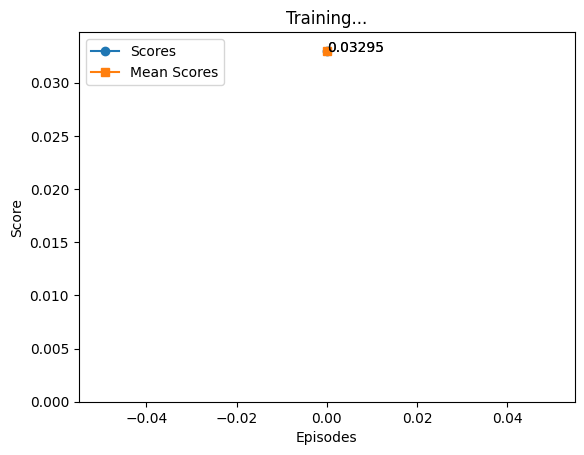

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 0.0165   |
| time/              |          |
|    fps             | 281      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0481      |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 2           |
|    time_elapsed         | 15          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009300744 |
|    clip_fraction        | 0.097       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.48       |
|    explained_variance   | -0.0889     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00696     |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.00998    |
|    value_loss           | 0.00208     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0351      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 3           |
|    time_elapsed         | 26          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.016198127 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.33        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0292     |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 0.00252     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0423      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 4           |
|    time_elapsed         | 36          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.015249444 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | -0.408      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0388     |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.000776    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0394      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 5           |
|    time_elapsed         | 44          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.015163695 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.0857      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0774      |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.022      |
|    value_loss           | 0.000568    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0374      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 6           |
|    time_elapsed         | 54          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.011410224 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.525       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0489     |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 0.00031     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0389     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 7          |
|    time_elapsed         | 62         |
|    total_timesteps      | 14336      |
| train/                  |            |
|    approx_kl            | 0.01347886 |
|    clip_fraction        | 0.131      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.61      |
|    explained_variance   | 0.679      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0219    |
|    n_updates            | 160        |
|    policy_gradient_loss | -0.0165    |
|    value_loss           | 0.000231   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0386     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 8          |
|    time_elapsed         | 71         |
|    total_timesteps      | 16384      |
| train/                  |            |
|    approx_kl            | 0.01989286 |
|    clip_fraction        | 0.157      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.63      |
|    explained_variance   | 0.16       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0604    |
|    n_updates            | 170        |
|    policy_gradient_loss | -0.013     |
|    value_loss           | 0.000189   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0343      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 9           |
|    time_elapsed         | 80          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.014815215 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.61       |
|    explained_variance   | 0.239       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00798    |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 0.000172    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0559      |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 10          |
|    time_elapsed         | 88          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.010830447 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 0.19        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0174     |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0104     |
|    value_loss           | 0.000474    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0534      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 11          |
|    time_elapsed         | 98          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.017658006 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | -1.56       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0118     |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.000152    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0531     |
| time/                   |            |
|    fps                  | 231        |
|    iterations           | 12         |
|    time_elapsed         | 106        |
|    total_timesteps      | 24576      |
| train/                  |            |
|    approx_kl            | 0.01282037 |
|    clip_fraction        | 0.121      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.56      |
|    explained_variance   | -0.22      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0168    |
|    n_updates            | 210        |
|    policy_gradient_loss | -0.0142    |
|    value_loss           | 8.9e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0523      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 13          |
|    time_elapsed         | 115         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.014953123 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | -1.67       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00089    |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 0.000143    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0486      |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 14          |
|    time_elapsed         | 124         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.011921694 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.5        |
|    explained_variance   | -1.86       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00331    |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 7.03e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 980         |
|    ep_rew_mean          | 0.0831      |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 15          |
|    time_elapsed         | 132         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.013529846 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.5        |
|    explained_variance   | -3.36       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0553     |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.016      |
|    value_loss           | 3.32e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.0793      |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 16          |
|    time_elapsed         | 142         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.012280059 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.5        |
|    explained_variance   | -0.0216     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0221      |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 0.00104     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 982         |
|    ep_rew_mean          | 0.0896      |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 17          |
|    time_elapsed         | 150         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.014805057 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 0.634       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0039     |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.0224     |
|    value_loss           | 0.000659    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.0875      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 18          |
|    time_elapsed         | 159         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.011092832 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.777       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0314     |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 0.000142    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.0854      |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 19          |
|    time_elapsed         | 168         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.015088353 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.61       |
|    explained_variance   | 0.777       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0193      |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 0.000125    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 985        |
|    ep_rew_mean          | 0.0836     |
| time/                   |            |
|    fps                  | 231        |
|    iterations           | 20         |
|    time_elapsed         | 176        |
|    total_timesteps      | 40960      |
| train/                  |            |
|    approx_kl            | 0.01989075 |
|    clip_fraction        | 0.172      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.48      |
|    explained_variance   | -1.25      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0399    |
|    n_updates            | 290        |
|    policy_gradient_loss | -0.0167    |
|    value_loss           | 6.51e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 986         |
|    ep_rew_mean          | 0.0812      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 21          |
|    time_elapsed         | 186         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.020767923 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.57       |
|    explained_variance   | 0.143       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0473     |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 0.000129    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 986         |
|    ep_rew_mean          | 0.0816      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 22          |
|    time_elapsed         | 194         |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.014344561 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | -0.312      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0307     |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 0.000101    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.0802      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 23          |
|    time_elapsed         | 203         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.015946697 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.49       |
|    explained_variance   | -2.2        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0418     |
|    n_updates            | 320         |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 0.000125    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.0789      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 24          |
|    time_elapsed         | 212         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.015330829 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.47       |
|    explained_variance   | 0.361       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0383     |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 4.23e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 988         |
|    ep_rew_mean          | 0.0787      |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 25          |
|    time_elapsed         | 220         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.012254916 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.104      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00948     |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.0165     |
|    value_loss           | 9.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.0881      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 26          |
|    time_elapsed         | 230         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.011659047 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.176       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0348     |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 4.15e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 984          |
|    ep_rew_mean          | 0.0877       |
| time/                   |              |
|    fps                  | 231          |
|    iterations           | 27           |
|    time_elapsed         | 239          |
|    total_timesteps      | 55296        |
| train/                  |              |
|    approx_kl            | 0.0128496345 |
|    clip_fraction        | 0.126        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.27        |
|    explained_variance   | 0.134        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0325      |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.0123      |
|    value_loss           | 0.000501     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 985         |
|    ep_rew_mean          | 0.0873      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 28          |
|    time_elapsed         | 247         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.013820326 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.133       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0165     |
|    n_updates            | 370         |
|    policy_gradient_loss | -0.0198     |
|    value_loss           | 8.77e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 986         |
|    ep_rew_mean          | 0.0844      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 29          |
|    time_elapsed         | 256         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.009015404 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | -0.305      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0201     |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.0141     |
|    value_loss           | 4.88e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 986         |
|    ep_rew_mean          | 0.0848      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 30          |
|    time_elapsed         | 265         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.010642464 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | -0.264      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0141     |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.0117     |
|    value_loss           | 4.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 986         |
|    ep_rew_mean          | 0.0845      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 31          |
|    time_elapsed         | 274         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.012868871 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | -0.172      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0451     |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 6.17e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.086       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 32          |
|    time_elapsed         | 283         |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.013886043 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_variance   | -0.298      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0194     |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 4.46e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.0835      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 33          |
|    time_elapsed         | 291         |
|    total_timesteps      | 67584       |
| train/                  |             |
|    approx_kl            | 0.013159591 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | 0.478       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0278     |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 8.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.0951      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 34          |
|    time_elapsed         | 301         |
|    total_timesteps      | 69632       |
| train/                  |             |
|    approx_kl            | 0.011880247 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.168       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.01       |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 4.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 982         |
|    ep_rew_mean          | 0.0939      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 35          |
|    time_elapsed         | 309         |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.015548162 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.086       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00748    |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.00808    |
|    value_loss           | 0.000759    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 982         |
|    ep_rew_mean          | 0.0918      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 36          |
|    time_elapsed         | 318         |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.019463211 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | -0.318      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0103     |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 8.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.0916      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 37          |
|    time_elapsed         | 327         |
|    total_timesteps      | 75776       |
| train/                  |             |
|    approx_kl            | 0.023145597 |
|    clip_fraction        | 0.261       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.0111      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.036      |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 3.79e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.0903      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 38          |
|    time_elapsed         | 335         |
|    total_timesteps      | 77824       |
| train/                  |             |
|    approx_kl            | 0.014894174 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.299       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.032      |
|    n_updates            | 470         |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 4.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 983          |
|    ep_rew_mean          | 0.0883       |
| time/                   |              |
|    fps                  | 231          |
|    iterations           | 39           |
|    time_elapsed         | 344          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0152364895 |
|    clip_fraction        | 0.178        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.31        |
|    explained_variance   | -0.0689      |
|    learning_rate        | 0.0003       |
|    loss                 | -0.031       |
|    n_updates            | 480          |
|    policy_gradient_loss | -0.0201      |
|    value_loss           | 4.7e-05      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.0882      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 40          |
|    time_elapsed         | 353         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.014748469 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | -0.366      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0141     |
|    n_updates            | 490         |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 3.08e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.088       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 41          |
|    time_elapsed         | 362         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.018804085 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.45       |
|    explained_variance   | -0.469      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0067     |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0242     |
|    value_loss           | 5.87e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 977         |
|    ep_rew_mean          | 0.102       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 42          |
|    time_elapsed         | 371         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.018309873 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.5        |
|    explained_variance   | 0.22        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0161     |
|    n_updates            | 510         |
|    policy_gradient_loss | -0.0229     |
|    value_loss           | 5.77e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 0.101       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 43          |
|    time_elapsed         | 380         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.016328186 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.57       |
|    explained_variance   | 0.175       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0178      |
|    n_updates            | 520         |
|    policy_gradient_loss | -0.0104     |
|    value_loss           | 0.00115     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 978        |
|    ep_rew_mean          | 0.1        |
| time/                   |            |
|    fps                  | 231        |
|    iterations           | 44         |
|    time_elapsed         | 389        |
|    total_timesteps      | 90112      |
| train/                  |            |
|    approx_kl            | 0.01621215 |
|    clip_fraction        | 0.174      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.39      |
|    explained_variance   | -0.421     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0923    |
|    n_updates            | 530        |
|    policy_gradient_loss | -0.0245    |
|    value_loss           | 0.00019    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 979         |
|    ep_rew_mean          | 0.0992      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 45          |
|    time_elapsed         | 398         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.020239923 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | -0.505      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0535     |
|    n_updates            | 540         |
|    policy_gradient_loss | -0.0366     |
|    value_loss           | 8.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 979        |
|    ep_rew_mean          | 0.0982     |
| time/                   |            |
|    fps                  | 231        |
|    iterations           | 46         |
|    time_elapsed         | 406        |
|    total_timesteps      | 94208      |
| train/                  |            |
|    approx_kl            | 0.02194912 |
|    clip_fraction        | 0.19       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.48      |
|    explained_variance   | 0.0296     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0342    |
|    n_updates            | 550        |
|    policy_gradient_loss | -0.0243    |
|    value_loss           | 5.79e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 980         |
|    ep_rew_mean          | 0.0982      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 47          |
|    time_elapsed         | 415         |
|    total_timesteps      | 96256       |
| train/                  |             |
|    approx_kl            | 0.021807715 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.44       |
|    explained_variance   | 0.409       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.062      |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 5.38e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 980         |
|    ep_rew_mean          | 0.0964      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 48          |
|    time_elapsed         | 424         |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.016298857 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.632       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0288     |
|    n_updates            | 570         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 2.37e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 980         |
|    ep_rew_mean          | 0.0972      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 49          |
|    time_elapsed         | 433         |
|    total_timesteps      | 100352      |
| train/                  |             |
|    approx_kl            | 0.022743326 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.49       |
|    explained_variance   | 0.32        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0412     |
|    n_updates            | 580         |
|    policy_gradient_loss | -0.0226     |
|    value_loss           | 3.07e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 980         |
|    ep_rew_mean          | 0.0964      |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 50          |
|    time_elapsed         | 442         |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.019997189 |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.47       |
|    explained_variance   | 0.336       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00339    |
|    n_updates            | 590         |
|    policy_gradient_loss | -0.0291     |
|    value_loss           | 2.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 973       |
|    ep_rew_mean          | 0.109     |
| time/                   |           |
|    fps                  | 231       |
|    iterations           | 51        |
|    time_elapsed         | 451       |
|    total_timesteps      | 104448    |
| train/                  |           |
|    approx_kl            | 0.0180786 |
|    clip_fraction        | 0.207     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.4      |
|    explained_variance   | 0.208     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0671   |
|    n_updates            | 600       |
|    policy_gradient_loss | -0.0258   |
|    value_loss           | 6.37e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 968         |
|    ep_rew_mean          | 0.119       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 52          |
|    time_elapsed         | 462         |
|    total_timesteps      | 106496      |
| train/                  |             |
|    approx_kl            | 0.015105397 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | -0.0037     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0064     |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.0131     |
|    value_loss           | 0.00102     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.132       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 53          |
|    time_elapsed         | 471         |
|    total_timesteps      | 108544      |
| train/                  |             |
|    approx_kl            | 0.020952553 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.0907      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0387     |
|    n_updates            | 620         |
|    policy_gradient_loss | -0.016      |
|    value_loss           | 0.00231     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 959        |
|    ep_rew_mean          | 0.135      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 54         |
|    time_elapsed         | 479        |
|    total_timesteps      | 110592     |
| train/                  |            |
|    approx_kl            | 0.01487245 |
|    clip_fraction        | 0.173      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.36      |
|    explained_variance   | 0.255      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0251    |
|    n_updates            | 630        |
|    policy_gradient_loss | -0.0174    |
|    value_loss           | 0.00179    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 959         |
|    ep_rew_mean          | 0.135       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 55          |
|    time_elapsed         | 489         |
|    total_timesteps      | 112640      |
| train/                  |             |
|    approx_kl            | 0.021461474 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.432       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0526     |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0236     |
|    value_loss           | 0.00119     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 956        |
|    ep_rew_mean          | 0.14       |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 56         |
|    time_elapsed         | 498        |
|    total_timesteps      | 114688     |
| train/                  |            |
|    approx_kl            | 0.02032533 |
|    clip_fraction        | 0.208      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.35      |
|    explained_variance   | 0.873      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0666    |
|    n_updates            | 650        |
|    policy_gradient_loss | -0.02      |
|    value_loss           | 0.000156   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 956         |
|    ep_rew_mean          | 0.14        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 57          |
|    time_elapsed         | 506         |
|    total_timesteps      | 116736      |
| train/                  |             |
|    approx_kl            | 0.029212635 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.232       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0136     |
|    n_updates            | 660         |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 0.000717    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 956         |
|    ep_rew_mean          | 0.14        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 58          |
|    time_elapsed         | 516         |
|    total_timesteps      | 118784      |
| train/                  |             |
|    approx_kl            | 0.017420404 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | -6.73       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00786     |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.0231     |
|    value_loss           | 0.00013     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 951         |
|    ep_rew_mean          | 0.152       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 59          |
|    time_elapsed         | 524         |
|    total_timesteps      | 120832      |
| train/                  |             |
|    approx_kl            | 0.023841023 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.314       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0227     |
|    n_updates            | 680         |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 0.000192    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 951         |
|    ep_rew_mean          | 0.155       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 60          |
|    time_elapsed         | 533         |
|    total_timesteps      | 122880      |
| train/                  |             |
|    approx_kl            | 0.018661344 |
|    clip_fraction        | 0.254       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_variance   | 0.116       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0282     |
|    n_updates            | 690         |
|    policy_gradient_loss | -0.0271     |
|    value_loss           | 0.00093     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 951         |
|    ep_rew_mean          | 0.156       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 61          |
|    time_elapsed         | 542         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.018227156 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.501       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0363     |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 0.000211    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 952         |
|    ep_rew_mean          | 0.156       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 62          |
|    time_elapsed         | 551         |
|    total_timesteps      | 126976      |
| train/                  |             |
|    approx_kl            | 0.019971814 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.686       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0629     |
|    n_updates            | 710         |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 0.000123    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 950         |
|    ep_rew_mean          | 0.157       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 63          |
|    time_elapsed         | 560         |
|    total_timesteps      | 129024      |
| train/                  |             |
|    approx_kl            | 0.017742444 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.0812      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0342     |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 0.000891    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 950         |
|    ep_rew_mean          | 0.157       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 64          |
|    time_elapsed         | 569         |
|    total_timesteps      | 131072      |
| train/                  |             |
|    approx_kl            | 0.015254013 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.18        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0351     |
|    n_updates            | 730         |
|    policy_gradient_loss | -0.0175     |
|    value_loss           | 0.000929    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 945        |
|    ep_rew_mean          | 0.166      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 65         |
|    time_elapsed         | 578        |
|    total_timesteps      | 133120     |
| train/                  |            |
|    approx_kl            | 0.01963412 |
|    clip_fraction        | 0.188      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.22      |
|    explained_variance   | 0.17       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0411    |
|    n_updates            | 740        |
|    policy_gradient_loss | -0.0217    |
|    value_loss           | 9.58e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 945         |
|    ep_rew_mean          | 0.168       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 66          |
|    time_elapsed         | 587         |
|    total_timesteps      | 135168      |
| train/                  |             |
|    approx_kl            | 0.013754903 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.747       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0337     |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.000412    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 945        |
|    ep_rew_mean          | 0.168      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 67         |
|    time_elapsed         | 595        |
|    total_timesteps      | 137216     |
| train/                  |            |
|    approx_kl            | 0.02244094 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.22      |
|    explained_variance   | 0.663      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0595    |
|    n_updates            | 760        |
|    policy_gradient_loss | -0.0232    |
|    value_loss           | 0.00148    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 935         |
|    ep_rew_mean          | 0.185       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 68          |
|    time_elapsed         | 605         |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.019541036 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.303       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.062      |
|    n_updates            | 770         |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 0.000145    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 935         |
|    ep_rew_mean          | 0.191       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 69          |
|    time_elapsed         | 614         |
|    total_timesteps      | 141312      |
| train/                  |             |
|    approx_kl            | 0.015371172 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.587       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0263     |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.00228     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 918        |
|    ep_rew_mean          | 0.218      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 70         |
|    time_elapsed         | 622        |
|    total_timesteps      | 143360     |
| train/                  |            |
|    approx_kl            | 0.01880189 |
|    clip_fraction        | 0.185      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.32      |
|    explained_variance   | 0.348      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.057     |
|    n_updates            | 790        |
|    policy_gradient_loss | -0.0177    |
|    value_loss           | 0.000989   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 921         |
|    ep_rew_mean          | 0.217       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 71          |
|    time_elapsed         | 632         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.020017918 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.553       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.041      |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 0.00277     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 921        |
|    ep_rew_mean          | 0.219      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 72         |
|    time_elapsed         | 640        |
|    total_timesteps      | 147456     |
| train/                  |            |
|    approx_kl            | 0.03287738 |
|    clip_fraction        | 0.261      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.95      |
|    explained_variance   | 0.175      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0745    |
|    n_updates            | 810        |
|    policy_gradient_loss | -0.0359    |
|    value_loss           | 0.000252   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 921         |
|    ep_rew_mean          | 0.218       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 73          |
|    time_elapsed         | 649         |
|    total_timesteps      | 149504      |
| train/                  |             |
|    approx_kl            | 0.029381078 |
|    clip_fraction        | 0.238       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.597       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0676     |
|    n_updates            | 820         |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 0.000914    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 921         |
|    ep_rew_mean          | 0.22        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 74          |
|    time_elapsed         | 658         |
|    total_timesteps      | 151552      |
| train/                  |             |
|    approx_kl            | 0.022037625 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | -0.675      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0624     |
|    n_updates            | 830         |
|    policy_gradient_loss | -0.0274     |
|    value_loss           | 0.000141    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 921        |
|    ep_rew_mean          | 0.221      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 75         |
|    time_elapsed         | 666        |
|    total_timesteps      | 153600     |
| train/                  |            |
|    approx_kl            | 0.01989074 |
|    clip_fraction        | 0.239      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.34      |
|    explained_variance   | 0.164      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0192    |
|    n_updates            | 840        |
|    policy_gradient_loss | -0.0193    |
|    value_loss           | 0.000104   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 921        |
|    ep_rew_mean          | 0.221      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 76         |
|    time_elapsed         | 675        |
|    total_timesteps      | 155648     |
| train/                  |            |
|    approx_kl            | 0.01960505 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.33      |
|    explained_variance   | 0.435      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0355    |
|    n_updates            | 850        |
|    policy_gradient_loss | -0.0174    |
|    value_loss           | 0.000207   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 921         |
|    ep_rew_mean          | 0.22        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 77          |
|    time_elapsed         | 683         |
|    total_timesteps      | 157696      |
| train/                  |             |
|    approx_kl            | 0.022987563 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | -0.0801     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0561     |
|    n_updates            | 860         |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 8.6e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 921        |
|    ep_rew_mean          | 0.22       |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 78         |
|    time_elapsed         | 692        |
|    total_timesteps      | 159744     |
| train/                  |            |
|    approx_kl            | 0.02412501 |
|    clip_fraction        | 0.189      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.29      |
|    explained_variance   | 0.538      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0318    |
|    n_updates            | 870        |
|    policy_gradient_loss | -0.0184    |
|    value_loss           | 4.18e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 925         |
|    ep_rew_mean          | 0.211       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 79          |
|    time_elapsed         | 701         |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.022529477 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | -4.3        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0192     |
|    n_updates            | 880         |
|    policy_gradient_loss | -0.0244     |
|    value_loss           | 1.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 925         |
|    ep_rew_mean          | 0.213       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 80          |
|    time_elapsed         | 710         |
|    total_timesteps      | 163840      |
| train/                  |             |
|    approx_kl            | 0.023825087 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | -0.171      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0197     |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 0.000453    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 925        |
|    ep_rew_mean          | 0.216      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 81         |
|    time_elapsed         | 719        |
|    total_timesteps      | 165888     |
| train/                  |            |
|    approx_kl            | 0.02311876 |
|    clip_fraction        | 0.21       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.06      |
|    explained_variance   | 0.181      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0634    |
|    n_updates            | 900        |
|    policy_gradient_loss | -0.022     |
|    value_loss           | 0.000395   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 925         |
|    ep_rew_mean          | 0.216       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 82          |
|    time_elapsed         | 727         |
|    total_timesteps      | 167936      |
| train/                  |             |
|    approx_kl            | 0.021729747 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.624       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0373     |
|    n_updates            | 910         |
|    policy_gradient_loss | -0.0238     |
|    value_loss           | 5.38e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 925         |
|    ep_rew_mean          | 0.217       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 83          |
|    time_elapsed         | 736         |
|    total_timesteps      | 169984      |
| train/                  |             |
|    approx_kl            | 0.016961977 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.0484      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0561     |
|    n_updates            | 920         |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 1.03e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 925        |
|    ep_rew_mean          | 0.219      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 84         |
|    time_elapsed         | 745        |
|    total_timesteps      | 172032     |
| train/                  |            |
|    approx_kl            | 0.02062571 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.11      |
|    explained_variance   | 0.0231     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0423    |
|    n_updates            | 930        |
|    policy_gradient_loss | -0.0172    |
|    value_loss           | 0.000205   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 916         |
|    ep_rew_mean          | 0.242       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 85          |
|    time_elapsed         | 753         |
|    total_timesteps      | 174080      |
| train/                  |             |
|    approx_kl            | 0.030371152 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | -0.057      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0317     |
|    n_updates            | 940         |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 0.000452    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 911         |
|    ep_rew_mean          | 0.248       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 86          |
|    time_elapsed         | 762         |
|    total_timesteps      | 176128      |
| train/                  |             |
|    approx_kl            | 0.023974162 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.0237      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0153     |
|    n_updates            | 950         |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 0.0022      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 918       |
|    ep_rew_mean          | 0.238     |
| time/                   |           |
|    fps                  | 230       |
|    iterations           | 87        |
|    time_elapsed         | 771       |
|    total_timesteps      | 178176    |
| train/                  |           |
|    approx_kl            | 0.0227056 |
|    clip_fraction        | 0.207     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1        |
|    explained_variance   | 0.236     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.00169  |
|    n_updates            | 960       |
|    policy_gradient_loss | -0.0185   |
|    value_loss           | 0.000789  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 918        |
|    ep_rew_mean          | 0.237      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 88         |
|    time_elapsed         | 780        |
|    total_timesteps      | 180224     |
| train/                  |            |
|    approx_kl            | 0.02860323 |
|    clip_fraction        | 0.195      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.16      |
|    explained_variance   | 0.332      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0152    |
|    n_updates            | 970        |
|    policy_gradient_loss | -0.0135    |
|    value_loss           | 0.000519   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 918         |
|    ep_rew_mean          | 0.236       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 89          |
|    time_elapsed         | 789         |
|    total_timesteps      | 182272      |
| train/                  |             |
|    approx_kl            | 0.021387827 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.983      |
|    explained_variance   | -0.492      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0482     |
|    n_updates            | 980         |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 9.27e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 917         |
|    ep_rew_mean          | 0.239       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 90          |
|    time_elapsed         | 798         |
|    total_timesteps      | 184320      |
| train/                  |             |
|    approx_kl            | 0.022143045 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.618       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0618     |
|    n_updates            | 990         |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 1.56e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 917         |
|    ep_rew_mean          | 0.24        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 91          |
|    time_elapsed         | 807         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.020464946 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.999      |
|    explained_variance   | 0.591       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0188     |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 0.000151    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 917         |
|    ep_rew_mean          | 0.243       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 92          |
|    time_elapsed         | 816         |
|    total_timesteps      | 188416      |
| train/                  |             |
|    approx_kl            | 0.021495558 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | -0.0504     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0495     |
|    n_updates            | 1010        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 2.97e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 917         |
|    ep_rew_mean          | 0.243       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 93          |
|    time_elapsed         | 824         |
|    total_timesteps      | 190464      |
| train/                  |             |
|    approx_kl            | 0.027352579 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.844      |
|    explained_variance   | -0.226      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0312     |
|    n_updates            | 1020        |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 0.00102     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 909         |
|    ep_rew_mean          | 0.26        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 94          |
|    time_elapsed         | 834         |
|    total_timesteps      | 192512      |
| train/                  |             |
|    approx_kl            | 0.016987894 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.952      |
|    explained_variance   | 0.693       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0259     |
|    n_updates            | 1030        |
|    policy_gradient_loss | -0.0125     |
|    value_loss           | 0.000597    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 912        |
|    ep_rew_mean          | 0.259      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 95         |
|    time_elapsed         | 843        |
|    total_timesteps      | 194560     |
| train/                  |            |
|    approx_kl            | 0.02510462 |
|    clip_fraction        | 0.197      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.09      |
|    explained_variance   | 0.384      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0205    |
|    n_updates            | 1040       |
|    policy_gradient_loss | -0.0143    |
|    value_loss           | 0.00219    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 917         |
|    ep_rew_mean          | 0.254       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 96          |
|    time_elapsed         | 851         |
|    total_timesteps      | 196608      |
| train/                  |             |
|    approx_kl            | 0.021543149 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.946      |
|    explained_variance   | 0.533       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0395     |
|    n_updates            | 1050        |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 0.000802    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 917         |
|    ep_rew_mean          | 0.259       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 97          |
|    time_elapsed         | 861         |
|    total_timesteps      | 198656      |
| train/                  |             |
|    approx_kl            | 0.024041804 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.02        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0128     |
|    n_updates            | 1060        |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 0.00122     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 925         |
|    ep_rew_mean          | 0.246       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 98          |
|    time_elapsed         | 869         |
|    total_timesteps      | 200704      |
| train/                  |             |
|    approx_kl            | 0.023773711 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | -0.0317     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0359     |
|    n_updates            | 1070        |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 0.000134    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 926         |
|    ep_rew_mean          | 0.245       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 99          |
|    time_elapsed         | 878         |
|    total_timesteps      | 202752      |
| train/                  |             |
|    approx_kl            | 0.029429583 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.872      |
|    explained_variance   | -0.73       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0446     |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.0224     |
|    value_loss           | 7.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 918         |
|    ep_rew_mean          | 0.259       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 100         |
|    time_elapsed         | 887         |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.019248266 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.349       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0456     |
|    n_updates            | 1090        |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 0.000109    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 921         |
|    ep_rew_mean          | 0.249       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 101         |
|    time_elapsed         | 895         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.026473628 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.316       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0178     |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 0.00082     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 913         |
|    ep_rew_mean          | 0.264       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 102         |
|    time_elapsed         | 905         |
|    total_timesteps      | 208896      |
| train/                  |             |
|    approx_kl            | 0.020863049 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | -5.69       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0281     |
|    n_updates            | 1110        |
|    policy_gradient_loss | -0.0236     |
|    value_loss           | 2.62e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 908         |
|    ep_rew_mean          | 0.27        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 103         |
|    time_elapsed         | 913         |
|    total_timesteps      | 210944      |
| train/                  |             |
|    approx_kl            | 0.018838238 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.909      |
|    explained_variance   | 0.288       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00194    |
|    n_updates            | 1120        |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 0.000752    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 911         |
|    ep_rew_mean          | 0.262       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 104         |
|    time_elapsed         | 922         |
|    total_timesteps      | 212992      |
| train/                  |             |
|    approx_kl            | 0.023514431 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.965      |
|    explained_variance   | 0.658       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0116     |
|    n_updates            | 1130        |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 0.00102     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 911        |
|    ep_rew_mean          | 0.26       |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 105        |
|    time_elapsed         | 931        |
|    total_timesteps      | 215040     |
| train/                  |            |
|    approx_kl            | 0.02697986 |
|    clip_fraction        | 0.255      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.11      |
|    explained_variance   | 0.653      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00611    |
|    n_updates            | 1140       |
|    policy_gradient_loss | -0.0188    |
|    value_loss           | 0.000548   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 911         |
|    ep_rew_mean          | 0.259       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 106         |
|    time_elapsed         | 939         |
|    total_timesteps      | 217088      |
| train/                  |             |
|    approx_kl            | 0.040944174 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | -0.0174     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0107     |
|    n_updates            | 1150        |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 2.9e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 917         |
|    ep_rew_mean          | 0.252       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 107         |
|    time_elapsed         | 948         |
|    total_timesteps      | 219136      |
| train/                  |             |
|    approx_kl            | 0.026053526 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.957      |
|    explained_variance   | -0.209      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0209     |
|    n_updates            | 1160        |
|    policy_gradient_loss | -0.0161     |
|    value_loss           | 3.74e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 919         |
|    ep_rew_mean          | 0.253       |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 108         |
|    time_elapsed         | 956         |
|    total_timesteps      | 221184      |
| train/                  |             |
|    approx_kl            | 0.022149011 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.952      |
|    explained_variance   | 0.166       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0208     |
|    n_updates            | 1170        |
|    policy_gradient_loss | -0.0195     |
|    value_loss           | 0.00082     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 912         |
|    ep_rew_mean          | 0.266       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 109         |
|    time_elapsed         | 968         |
|    total_timesteps      | 223232      |
| train/                  |             |
|    approx_kl            | 0.023631716 |
|    clip_fraction        | 0.255       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | -0.141      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0149     |
|    n_updates            | 1180        |
|    policy_gradient_loss | -0.0229     |
|    value_loss           | 0.000253    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 907         |
|    ep_rew_mean          | 0.273       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 110         |
|    time_elapsed         | 977         |
|    total_timesteps      | 225280      |
| train/                  |             |
|    approx_kl            | 0.025705937 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.911      |
|    explained_variance   | 0.248       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00218     |
|    n_updates            | 1190        |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 0.000628    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 897         |
|    ep_rew_mean          | 0.295       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 111         |
|    time_elapsed         | 985         |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.026930459 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.447       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0623     |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 0.00171     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 901        |
|    ep_rew_mean          | 0.287      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 112        |
|    time_elapsed         | 995        |
|    total_timesteps      | 229376     |
| train/                  |            |
|    approx_kl            | 0.02658588 |
|    clip_fraction        | 0.232      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.03      |
|    explained_variance   | 0.485      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0376    |
|    n_updates            | 1210       |
|    policy_gradient_loss | -0.0212    |
|    value_loss           | 0.00236    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 901         |
|    ep_rew_mean          | 0.282       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 113         |
|    time_elapsed         | 1003        |
|    total_timesteps      | 231424      |
| train/                  |             |
|    approx_kl            | 0.027968364 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.972      |
|    explained_variance   | 0.581       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0435     |
|    n_updates            | 1220        |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 0.00129     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 912         |
|    ep_rew_mean          | 0.264       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 114         |
|    time_elapsed         | 1012        |
|    total_timesteps      | 233472      |
| train/                  |             |
|    approx_kl            | 0.029106382 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.964      |
|    explained_variance   | 0.491       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0607     |
|    n_updates            | 1230        |
|    policy_gradient_loss | -0.0277     |
|    value_loss           | 0.000142    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 914         |
|    ep_rew_mean          | 0.261       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 115         |
|    time_elapsed         | 1021        |
|    total_timesteps      | 235520      |
| train/                  |             |
|    approx_kl            | 0.023634255 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | -0.093      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0474     |
|    n_updates            | 1240        |
|    policy_gradient_loss | -0.0307     |
|    value_loss           | 0.000693    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 903         |
|    ep_rew_mean          | 0.28        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 116         |
|    time_elapsed         | 1031        |
|    total_timesteps      | 237568      |
| train/                  |             |
|    approx_kl            | 0.026638493 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.413       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0233     |
|    n_updates            | 1250        |
|    policy_gradient_loss | -0.0131     |
|    value_loss           | 0.000864    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 892        |
|    ep_rew_mean          | 0.298      |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 117        |
|    time_elapsed         | 1040       |
|    total_timesteps      | 239616     |
| train/                  |            |
|    approx_kl            | 0.02349815 |
|    clip_fraction        | 0.199      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.994     |
|    explained_variance   | 0.482      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.028     |
|    n_updates            | 1260       |
|    policy_gradient_loss | -0.0243    |
|    value_loss           | 0.00254    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 881         |
|    ep_rew_mean          | 0.315       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 118         |
|    time_elapsed         | 1049        |
|    total_timesteps      | 241664      |
| train/                  |             |
|    approx_kl            | 0.023922041 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.958      |
|    explained_variance   | 0.305       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.4e-05     |
|    n_updates            | 1270        |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 0.00241     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 878        |
|    ep_rew_mean          | 0.32       |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 119        |
|    time_elapsed         | 1058       |
|    total_timesteps      | 243712     |
| train/                  |            |
|    approx_kl            | 0.03706198 |
|    clip_fraction        | 0.253      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.11      |
|    explained_variance   | 0.669      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.05      |
|    n_updates            | 1280       |
|    policy_gradient_loss | -0.0191    |
|    value_loss           | 0.00097    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 874         |
|    ep_rew_mean          | 0.33        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 120         |
|    time_elapsed         | 1068        |
|    total_timesteps      | 245760      |
| train/                  |             |
|    approx_kl            | 0.017886478 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.919      |
|    explained_variance   | 0.417       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0419     |
|    n_updates            | 1290        |
|    policy_gradient_loss | -0.0124     |
|    value_loss           | 0.000951    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 866         |
|    ep_rew_mean          | 0.346       |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 121         |
|    time_elapsed         | 1076        |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.022773154 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.866      |
|    explained_variance   | 0.431       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0433     |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 0.00087     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 844         |
|    ep_rew_mean          | 0.38        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 122         |
|    time_elapsed         | 1086        |
|    total_timesteps      | 249856      |
| train/                  |             |
|    approx_kl            | 0.020023488 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.942      |
|    explained_variance   | 0.773       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0322     |
|    n_updates            | 1310        |
|    policy_gradient_loss | -0.0165     |
|    value_loss           | 0.00128     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 831         |
|    ep_rew_mean          | 0.402       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 123         |
|    time_elapsed         | 1096        |
|    total_timesteps      | 251904      |
| train/                  |             |
|    approx_kl            | 0.026699202 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.488       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0185     |
|    n_updates            | 1320        |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 0.00291     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 823         |
|    ep_rew_mean          | 0.415       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 124         |
|    time_elapsed         | 1105        |
|    total_timesteps      | 253952      |
| train/                  |             |
|    approx_kl            | 0.025145525 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.978      |
|    explained_variance   | 0.66        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0385     |
|    n_updates            | 1330        |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 0.00184     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 823         |
|    ep_rew_mean          | 0.409       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 125         |
|    time_elapsed         | 1114        |
|    total_timesteps      | 256000      |
| train/                  |             |
|    approx_kl            | 0.026951099 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.185       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0597     |
|    n_updates            | 1340        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 0.00311     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 827         |
|    ep_rew_mean          | 0.409       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 126         |
|    time_elapsed         | 1124        |
|    total_timesteps      | 258048      |
| train/                  |             |
|    approx_kl            | 0.023301277 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.92       |
|    explained_variance   | 0.365       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0319     |
|    n_updates            | 1350        |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 0.00308     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 827         |
|    ep_rew_mean          | 0.412       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 127         |
|    time_elapsed         | 1132        |
|    total_timesteps      | 260096      |
| train/                  |             |
|    approx_kl            | 0.026985126 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.911      |
|    explained_variance   | 0.239       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0588     |
|    n_updates            | 1360        |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 0.00248     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 802         |
|    ep_rew_mean          | 0.457       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 128         |
|    time_elapsed         | 1142        |
|    total_timesteps      | 262144      |
| train/                  |             |
|    approx_kl            | 0.040242698 |
|    clip_fraction        | 0.314       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.939      |
|    explained_variance   | -0.117      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.051      |
|    n_updates            | 1370        |
|    policy_gradient_loss | -0.000369   |
|    value_loss           | 0.000233    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 801         |
|    ep_rew_mean          | 0.468       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 129         |
|    time_elapsed         | 1151        |
|    total_timesteps      | 264192      |
| train/                  |             |
|    approx_kl            | 0.027218789 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.94       |
|    explained_variance   | 0.238       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0326     |
|    n_updates            | 1380        |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 0.00542     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 801         |
|    ep_rew_mean          | 0.468       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 130         |
|    time_elapsed         | 1161        |
|    total_timesteps      | 266240      |
| train/                  |             |
|    approx_kl            | 0.032744788 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.962      |
|    explained_variance   | 0.441       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0573      |
|    n_updates            | 1390        |
|    policy_gradient_loss | -0.0224     |
|    value_loss           | 0.00204     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 775         |
|    ep_rew_mean          | 0.504       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 131         |
|    time_elapsed         | 1170        |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.021018079 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.962      |
|    explained_variance   | -0.463      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0285     |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 0.000691    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 783         |
|    ep_rew_mean          | 0.493       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 132         |
|    time_elapsed         | 1179        |
|    total_timesteps      | 270336      |
| train/                  |             |
|    approx_kl            | 0.025405254 |
|    clip_fraction        | 0.234       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.963      |
|    explained_variance   | 0.226       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00354    |
|    n_updates            | 1410        |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 0.00373     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 776         |
|    ep_rew_mean          | 0.501       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 133         |
|    time_elapsed         | 1188        |
|    total_timesteps      | 272384      |
| train/                  |             |
|    approx_kl            | 0.026849927 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -1.24       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0668     |
|    n_updates            | 1420        |
|    policy_gradient_loss | -0.034      |
|    value_loss           | 0.000333    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 763         |
|    ep_rew_mean          | 0.513       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 134         |
|    time_elapsed         | 1198        |
|    total_timesteps      | 274432      |
| train/                  |             |
|    approx_kl            | 0.052443057 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.947      |
|    explained_variance   | 0.573       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0327      |
|    n_updates            | 1430        |
|    policy_gradient_loss | -0.00657    |
|    value_loss           | 0.00106     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 758        |
|    ep_rew_mean          | 0.522      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 135        |
|    time_elapsed         | 1206       |
|    total_timesteps      | 276480     |
| train/                  |            |
|    approx_kl            | 0.02181862 |
|    clip_fraction        | 0.211      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.972     |
|    explained_variance   | 0.685      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0562    |
|    n_updates            | 1440       |
|    policy_gradient_loss | -0.0212    |
|    value_loss           | 0.00273    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 747        |
|    ep_rew_mean          | 0.541      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 136        |
|    time_elapsed         | 1216       |
|    total_timesteps      | 278528     |
| train/                  |            |
|    approx_kl            | 0.03003322 |
|    clip_fraction        | 0.266      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.01      |
|    explained_variance   | 0.758      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.047     |
|    n_updates            | 1450       |
|    policy_gradient_loss | -0.0184    |
|    value_loss           | 0.000817   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 739         |
|    ep_rew_mean          | 0.551       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 137         |
|    time_elapsed         | 1225        |
|    total_timesteps      | 280576      |
| train/                  |             |
|    approx_kl            | 0.024087194 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.542       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0363     |
|    n_updates            | 1460        |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 0.00202     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 737         |
|    ep_rew_mean          | 0.558       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 138         |
|    time_elapsed         | 1234        |
|    total_timesteps      | 282624      |
| train/                  |             |
|    approx_kl            | 0.025067486 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.909      |
|    explained_variance   | 0.63        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0354     |
|    n_updates            | 1470        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 0.00158     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 728         |
|    ep_rew_mean          | 0.573       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 139         |
|    time_elapsed         | 1244        |
|    total_timesteps      | 284672      |
| train/                  |             |
|    approx_kl            | 0.027183754 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.923      |
|    explained_variance   | 0.575       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0553     |
|    n_updates            | 1480        |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 0.00314     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 726         |
|    ep_rew_mean          | 0.576       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 140         |
|    time_elapsed         | 1254        |
|    total_timesteps      | 286720      |
| train/                  |             |
|    approx_kl            | 0.027913386 |
|    clip_fraction        | 0.273       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.992      |
|    explained_variance   | 0.572       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0144     |
|    n_updates            | 1490        |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 0.00289     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 719         |
|    ep_rew_mean          | 0.592       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 141         |
|    time_elapsed         | 1263        |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.029427946 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.892      |
|    explained_variance   | -0.324      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0545     |
|    n_updates            | 1500        |
|    policy_gradient_loss | -0.0236     |
|    value_loss           | 0.00229     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 719         |
|    ep_rew_mean          | 0.591       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 142         |
|    time_elapsed         | 1272        |
|    total_timesteps      | 290816      |
| train/                  |             |
|    approx_kl            | 0.028552769 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.67       |
|    explained_variance   | 0.415       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.035      |
|    n_updates            | 1510        |
|    policy_gradient_loss | -0.0209     |
|    value_loss           | 0.00135     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 710         |
|    ep_rew_mean          | 0.606       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 143         |
|    time_elapsed         | 1281        |
|    total_timesteps      | 292864      |
| train/                  |             |
|    approx_kl            | 0.030127436 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.922      |
|    explained_variance   | 0.0866      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0149     |
|    n_updates            | 1520        |
|    policy_gradient_loss | -0.0252     |
|    value_loss           | 0.00112     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 714        |
|    ep_rew_mean          | 0.595      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 144        |
|    time_elapsed         | 1291       |
|    total_timesteps      | 294912     |
| train/                  |            |
|    approx_kl            | 0.05433619 |
|    clip_fraction        | 0.163      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.715     |
|    explained_variance   | 0.752      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0819    |
|    n_updates            | 1530       |
|    policy_gradient_loss | -0.00932   |
|    value_loss           | 0.00235    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 717         |
|    ep_rew_mean          | 0.592       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 145         |
|    time_elapsed         | 1300        |
|    total_timesteps      | 296960      |
| train/                  |             |
|    approx_kl            | 0.021948436 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.816      |
|    explained_variance   | 0.587       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0232     |
|    n_updates            | 1540        |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 0.00106     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 703         |
|    ep_rew_mean          | 0.614       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 146         |
|    time_elapsed         | 1309        |
|    total_timesteps      | 299008      |
| train/                  |             |
|    approx_kl            | 0.028478514 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.805      |
|    explained_variance   | 0.598       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.033      |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.0132     |
|    value_loss           | 0.00135     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 701         |
|    ep_rew_mean          | 0.618       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 147         |
|    time_elapsed         | 1319        |
|    total_timesteps      | 301056      |
| train/                  |             |
|    approx_kl            | 0.021742862 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.901      |
|    explained_variance   | 0.659       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0106     |
|    n_updates            | 1560        |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 0.0046      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 695         |
|    ep_rew_mean          | 0.63        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 148         |
|    time_elapsed         | 1328        |
|    total_timesteps      | 303104      |
| train/                  |             |
|    approx_kl            | 0.022364344 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.896      |
|    explained_variance   | 0.418       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00391    |
|    n_updates            | 1570        |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 0.00202     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 695         |
|    ep_rew_mean          | 0.627       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 149         |
|    time_elapsed         | 1337        |
|    total_timesteps      | 305152      |
| train/                  |             |
|    approx_kl            | 0.020092782 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.812      |
|    explained_variance   | 0.635       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0215     |
|    n_updates            | 1580        |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 0.0045      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 703        |
|    ep_rew_mean          | 0.612      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 150        |
|    time_elapsed         | 1346       |
|    total_timesteps      | 307200     |
| train/                  |            |
|    approx_kl            | 0.02735633 |
|    clip_fraction        | 0.211      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.767     |
|    explained_variance   | 0.597      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0316    |
|    n_updates            | 1590       |
|    policy_gradient_loss | -0.0215    |
|    value_loss           | 0.00131    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 706        |
|    ep_rew_mean          | 0.609      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 151        |
|    time_elapsed         | 1355       |
|    total_timesteps      | 309248     |
| train/                  |            |
|    approx_kl            | 0.03733836 |
|    clip_fraction        | 0.301      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.826     |
|    explained_variance   | 0.276      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0604    |
|    n_updates            | 1600       |
|    policy_gradient_loss | -0.0289    |
|    value_loss           | 0.000754   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 713         |
|    ep_rew_mean          | 0.598       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 152         |
|    time_elapsed         | 1364        |
|    total_timesteps      | 311296      |
| train/                  |             |
|    approx_kl            | 0.035430122 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.69       |
|    explained_variance   | 0.441       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00755    |
|    n_updates            | 1610        |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 0.00188     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 716         |
|    ep_rew_mean          | 0.594       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 153         |
|    time_elapsed         | 1373        |
|    total_timesteps      | 313344      |
| train/                  |             |
|    approx_kl            | 0.032410517 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.854      |
|    explained_variance   | 0.526       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0329      |
|    n_updates            | 1620        |
|    policy_gradient_loss | -0.0268     |
|    value_loss           | 0.000487    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 706         |
|    ep_rew_mean          | 0.611       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 154         |
|    time_elapsed         | 1382        |
|    total_timesteps      | 315392      |
| train/                  |             |
|    approx_kl            | 0.040032957 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.859      |
|    explained_variance   | 0.338       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0427     |
|    n_updates            | 1630        |
|    policy_gradient_loss | -0.0278     |
|    value_loss           | 0.000403    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 710         |
|    ep_rew_mean          | 0.601       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 155         |
|    time_elapsed         | 1391        |
|    total_timesteps      | 317440      |
| train/                  |             |
|    approx_kl            | 0.023585657 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.62       |
|    explained_variance   | 0.0538      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00612    |
|    n_updates            | 1640        |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 0.00195     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 712         |
|    ep_rew_mean          | 0.596       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 156         |
|    time_elapsed         | 1401        |
|    total_timesteps      | 319488      |
| train/                  |             |
|    approx_kl            | 0.028433677 |
|    clip_fraction        | 0.237       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.972      |
|    explained_variance   | -2.28       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0498     |
|    n_updates            | 1650        |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 0.000207    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 718        |
|    ep_rew_mean          | 0.585      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 157        |
|    time_elapsed         | 1409       |
|    total_timesteps      | 321536     |
| train/                  |            |
|    approx_kl            | 0.03474401 |
|    clip_fraction        | 0.234      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.918     |
|    explained_variance   | 0.427      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0301    |
|    n_updates            | 1660       |
|    policy_gradient_loss | -0.0149    |
|    value_loss           | 0.000614   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 724        |
|    ep_rew_mean          | 0.575      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 158        |
|    time_elapsed         | 1419       |
|    total_timesteps      | 323584     |
| train/                  |            |
|    approx_kl            | 0.04515446 |
|    clip_fraction        | 0.238      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.825     |
|    explained_variance   | 0.324      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0315    |
|    n_updates            | 1670       |
|    policy_gradient_loss | -0.0218    |
|    value_loss           | 0.000804   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 731        |
|    ep_rew_mean          | 0.565      |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 159        |
|    time_elapsed         | 1428       |
|    total_timesteps      | 325632     |
| train/                  |            |
|    approx_kl            | 0.04511526 |
|    clip_fraction        | 0.242      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.821     |
|    explained_variance   | 0.59       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0297    |
|    n_updates            | 1680       |
|    policy_gradient_loss | -0.0194    |
|    value_loss           | 0.00192    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 737         |
|    ep_rew_mean          | 0.555       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 160         |
|    time_elapsed         | 1436        |
|    total_timesteps      | 327680      |
| train/                  |             |
|    approx_kl            | 0.023273941 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.993      |
|    explained_variance   | -0.0642     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0375     |
|    n_updates            | 1690        |
|    policy_gradient_loss | -0.0218     |
|    value_loss           | 0.000899    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 738         |
|    ep_rew_mean          | 0.553       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 161         |
|    time_elapsed         | 1446        |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.030742709 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.838      |
|    explained_variance   | 0.234       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0125     |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 0.000699    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 731         |
|    ep_rew_mean          | 0.558       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 162         |
|    time_elapsed         | 1454        |
|    total_timesteps      | 331776      |
| train/                  |             |
|    approx_kl            | 0.028111164 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.979      |
|    explained_variance   | 0.545       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.023      |
|    n_updates            | 1710        |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 0.0013      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 729         |
|    ep_rew_mean          | 0.566       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 163         |
|    time_elapsed         | 1464        |
|    total_timesteps      | 333824      |
| train/                  |             |
|    approx_kl            | 0.032227352 |
|    clip_fraction        | 0.261       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.987      |
|    explained_variance   | 0.661       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0371     |
|    n_updates            | 1720        |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 0.00167     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 736        |
|    ep_rew_mean          | 0.551      |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 164        |
|    time_elapsed         | 1475       |
|    total_timesteps      | 335872     |
| train/                  |            |
|    approx_kl            | 0.02844702 |
|    clip_fraction        | 0.196      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.77      |
|    explained_variance   | 0.564      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0305    |
|    n_updates            | 1730       |
|    policy_gradient_loss | -0.0211    |
|    value_loss           | 0.00214    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 739         |
|    ep_rew_mean          | 0.539       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 165         |
|    time_elapsed         | 1484        |
|    total_timesteps      | 337920      |
| train/                  |             |
|    approx_kl            | 0.026943304 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.922      |
|    explained_variance   | -0.114      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0656     |
|    n_updates            | 1740        |
|    policy_gradient_loss | -0.023      |
|    value_loss           | 0.00239     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 732         |
|    ep_rew_mean          | 0.548       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 166         |
|    time_elapsed         | 1494        |
|    total_timesteps      | 339968      |
| train/                  |             |
|    approx_kl            | 0.022862945 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.852      |
|    explained_variance   | 0.00523     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0366     |
|    n_updates            | 1750        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 0.00117     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 740         |
|    ep_rew_mean          | 0.534       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 167         |
|    time_elapsed         | 1503        |
|    total_timesteps      | 342016      |
| train/                  |             |
|    approx_kl            | 0.023456939 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.839      |
|    explained_variance   | 0.424       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0338     |
|    n_updates            | 1760        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 0.00111     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 753         |
|    ep_rew_mean          | 0.512       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 168         |
|    time_elapsed         | 1512        |
|    total_timesteps      | 344064      |
| train/                  |             |
|    approx_kl            | 0.027600413 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | 0.29        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0419     |
|    n_updates            | 1770        |
|    policy_gradient_loss | -0.0121     |
|    value_loss           | 7.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 751         |
|    ep_rew_mean          | 0.519       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 169         |
|    time_elapsed         | 1521        |
|    total_timesteps      | 346112      |
| train/                  |             |
|    approx_kl            | 0.025194122 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.819      |
|    explained_variance   | 0.0708      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0508     |
|    n_updates            | 1780        |
|    policy_gradient_loss | -0.0289     |
|    value_loss           | 0.00029     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 751        |
|    ep_rew_mean          | 0.522      |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 170        |
|    time_elapsed         | 1530       |
|    total_timesteps      | 348160     |
| train/                  |            |
|    approx_kl            | 0.02960905 |
|    clip_fraction        | 0.235      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.924     |
|    explained_variance   | 0.255      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0239    |
|    n_updates            | 1790       |
|    policy_gradient_loss | -0.0173    |
|    value_loss           | 0.00168    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 759         |
|    ep_rew_mean          | 0.508       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 171         |
|    time_elapsed         | 1539        |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.022185814 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.967      |
|    explained_variance   | 0.291       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0247     |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 0.00187     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 760         |
|    ep_rew_mean          | 0.507       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 172         |
|    time_elapsed         | 1549        |
|    total_timesteps      | 352256      |
| train/                  |             |
|    approx_kl            | 0.024505936 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.959      |
|    explained_variance   | 0.291       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0241     |
|    n_updates            | 1810        |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 0.000498    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 764         |
|    ep_rew_mean          | 0.498       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 173         |
|    time_elapsed         | 1557        |
|    total_timesteps      | 354304      |
| train/                  |             |
|    approx_kl            | 0.025619522 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.836      |
|    explained_variance   | 0.574       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0217     |
|    n_updates            | 1820        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.000491    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 767         |
|    ep_rew_mean          | 0.494       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 174         |
|    time_elapsed         | 1567        |
|    total_timesteps      | 356352      |
| train/                  |             |
|    approx_kl            | 0.023627033 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.609      |
|    explained_variance   | 0.561       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0175      |
|    n_updates            | 1830        |
|    policy_gradient_loss | -0.0102     |
|    value_loss           | 0.000525    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 774        |
|    ep_rew_mean          | 0.487      |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 175        |
|    time_elapsed         | 1577       |
|    total_timesteps      | 358400     |
| train/                  |            |
|    approx_kl            | 0.03778393 |
|    clip_fraction        | 0.245      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.759     |
|    explained_variance   | 0.518      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.062     |
|    n_updates            | 1840       |
|    policy_gradient_loss | -0.0267    |
|    value_loss           | 0.00103    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 771        |
|    ep_rew_mean          | 0.491      |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 176        |
|    time_elapsed         | 1586       |
|    total_timesteps      | 360448     |
| train/                  |            |
|    approx_kl            | 0.04390697 |
|    clip_fraction        | 0.293      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.906     |
|    explained_variance   | 0.393      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0688    |
|    n_updates            | 1850       |
|    policy_gradient_loss | -0.031     |
|    value_loss           | 0.00115    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 772        |
|    ep_rew_mean          | 0.491      |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 177        |
|    time_elapsed         | 1596       |
|    total_timesteps      | 362496     |
| train/                  |            |
|    approx_kl            | 0.02665433 |
|    clip_fraction        | 0.232      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.982     |
|    explained_variance   | 0.465      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00333   |
|    n_updates            | 1860       |
|    policy_gradient_loss | -0.0166    |
|    value_loss           | 0.00169    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 767        |
|    ep_rew_mean          | 0.495      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 178        |
|    time_elapsed         | 1606       |
|    total_timesteps      | 364544     |
| train/                  |            |
|    approx_kl            | 0.02840748 |
|    clip_fraction        | 0.208      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.915     |
|    explained_variance   | 0.636      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0148    |
|    n_updates            | 1870       |
|    policy_gradient_loss | -0.0199    |
|    value_loss           | 0.00216    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 764        |
|    ep_rew_mean          | 0.5        |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 179        |
|    time_elapsed         | 1615       |
|    total_timesteps      | 366592     |
| train/                  |            |
|    approx_kl            | 0.04130346 |
|    clip_fraction        | 0.273      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.811     |
|    explained_variance   | 0.727      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0307    |
|    n_updates            | 1880       |
|    policy_gradient_loss | -0.0205    |
|    value_loss           | 0.00285    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 759         |
|    ep_rew_mean          | 0.503       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 180         |
|    time_elapsed         | 1624        |
|    total_timesteps      | 368640      |
| train/                  |             |
|    approx_kl            | 0.022039242 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.955      |
|    explained_variance   | -0.0492     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0189     |
|    n_updates            | 1890        |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 0.00164     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 766         |
|    ep_rew_mean          | 0.491       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 181         |
|    time_elapsed         | 1633        |
|    total_timesteps      | 370688      |
| train/                  |             |
|    approx_kl            | 0.018128932 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.917      |
|    explained_variance   | 0.745       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0174     |
|    n_updates            | 1900        |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 0.000427    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 770        |
|    ep_rew_mean          | 0.483      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 182        |
|    time_elapsed         | 1642       |
|    total_timesteps      | 372736     |
| train/                  |            |
|    approx_kl            | 0.03306669 |
|    clip_fraction        | 0.185      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.641     |
|    explained_variance   | 0.68       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0537    |
|    n_updates            | 1910       |
|    policy_gradient_loss | -0.0154    |
|    value_loss           | 0.000644   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 770         |
|    ep_rew_mean          | 0.479       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 183         |
|    time_elapsed         | 1652        |
|    total_timesteps      | 374784      |
| train/                  |             |
|    approx_kl            | 0.026146684 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.865      |
|    explained_variance   | 0.805       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0352     |
|    n_updates            | 1920        |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 0.000655    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 780        |
|    ep_rew_mean          | 0.466      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 184        |
|    time_elapsed         | 1661       |
|    total_timesteps      | 376832     |
| train/                  |            |
|    approx_kl            | 0.03272489 |
|    clip_fraction        | 0.216      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.02      |
|    explained_variance   | 0.707      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0429    |
|    n_updates            | 1930       |
|    policy_gradient_loss | -0.0234    |
|    value_loss           | 0.00086    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 786         |
|    ep_rew_mean          | 0.456       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 185         |
|    time_elapsed         | 1670        |
|    total_timesteps      | 378880      |
| train/                  |             |
|    approx_kl            | 0.029140338 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.98       |
|    explained_variance   | 0.782       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0417     |
|    n_updates            | 1940        |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 0.00235     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 786        |
|    ep_rew_mean          | 0.453      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 186        |
|    time_elapsed         | 1680       |
|    total_timesteps      | 380928     |
| train/                  |            |
|    approx_kl            | 0.02177216 |
|    clip_fraction        | 0.212      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.842     |
|    explained_variance   | 0.594      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0384    |
|    n_updates            | 1950       |
|    policy_gradient_loss | -0.0129    |
|    value_loss           | 0.000374   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 781         |
|    ep_rew_mean          | 0.461       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 187         |
|    time_elapsed         | 1688        |
|    total_timesteps      | 382976      |
| train/                  |             |
|    approx_kl            | 0.028469522 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.95       |
|    explained_variance   | 0.439       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0327     |
|    n_updates            | 1960        |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 0.00127     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 781        |
|    ep_rew_mean          | 0.462      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 188        |
|    time_elapsed         | 1698       |
|    total_timesteps      | 385024     |
| train/                  |            |
|    approx_kl            | 0.03876797 |
|    clip_fraction        | 0.25       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.1       |
|    explained_variance   | -0.329     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0438    |
|    n_updates            | 1970       |
|    policy_gradient_loss | -0.0201    |
|    value_loss           | 0.00214    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 788         |
|    ep_rew_mean          | 0.449       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 189         |
|    time_elapsed         | 1707        |
|    total_timesteps      | 387072      |
| train/                  |             |
|    approx_kl            | 0.025702763 |
|    clip_fraction        | 0.253       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | -1.33       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0475     |
|    n_updates            | 1980        |
|    policy_gradient_loss | -0.0218     |
|    value_loss           | 0.000387    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 781        |
|    ep_rew_mean          | 0.457      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 190        |
|    time_elapsed         | 1715       |
|    total_timesteps      | 389120     |
| train/                  |            |
|    approx_kl            | 0.05093524 |
|    clip_fraction        | 0.266      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.609     |
|    explained_variance   | 0.28       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0395    |
|    n_updates            | 1990       |
|    policy_gradient_loss | -0.037     |
|    value_loss           | 0.000157   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 781        |
|    ep_rew_mean          | 0.453      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 191        |
|    time_elapsed         | 1725       |
|    total_timesteps      | 391168     |
| train/                  |            |
|    approx_kl            | 0.02643996 |
|    clip_fraction        | 0.237      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.925     |
|    explained_variance   | 0.528      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0573    |
|    n_updates            | 2000       |
|    policy_gradient_loss | -0.0203    |
|    value_loss           | 0.00184    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 783         |
|    ep_rew_mean          | 0.449       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 192         |
|    time_elapsed         | 1734        |
|    total_timesteps      | 393216      |
| train/                  |             |
|    approx_kl            | 0.024257604 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.924      |
|    explained_variance   | 0.205       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0607     |
|    n_updates            | 2010        |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 0.000442    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 783         |
|    ep_rew_mean          | 0.454       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 193         |
|    time_elapsed         | 1743        |
|    total_timesteps      | 395264      |
| train/                  |             |
|    approx_kl            | 0.031838376 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.871      |
|    explained_variance   | 0.287       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0203     |
|    n_updates            | 2020        |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 0.00232     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 783        |
|    ep_rew_mean          | 0.454      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 194        |
|    time_elapsed         | 1752       |
|    total_timesteps      | 397312     |
| train/                  |            |
|    approx_kl            | 0.02270795 |
|    clip_fraction        | 0.191      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.789     |
|    explained_variance   | 0.62       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0292    |
|    n_updates            | 2030       |
|    policy_gradient_loss | -0.0163    |
|    value_loss           | 0.000758   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 791         |
|    ep_rew_mean          | 0.441       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 195         |
|    time_elapsed         | 1761        |
|    total_timesteps      | 399360      |
| train/                  |             |
|    approx_kl            | 0.028774552 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.948      |
|    explained_variance   | 0.551       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0256     |
|    n_updates            | 2040        |
|    policy_gradient_loss | -0.0275     |
|    value_loss           | 9.72e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 792        |
|    ep_rew_mean          | 0.439      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 196        |
|    time_elapsed         | 1771       |
|    total_timesteps      | 401408     |
| train/                  |            |
|    approx_kl            | 0.02909638 |
|    clip_fraction        | 0.24       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.909     |
|    explained_variance   | 0.389      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0424    |
|    n_updates            | 2050       |
|    policy_gradient_loss | -0.0187    |
|    value_loss           | 0.000243   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 789         |
|    ep_rew_mean          | 0.44        |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 197         |
|    time_elapsed         | 1780        |
|    total_timesteps      | 403456      |
| train/                  |             |
|    approx_kl            | 0.034436677 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.971      |
|    explained_variance   | 0.498       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0702     |
|    n_updates            | 2060        |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 0.000846    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 789         |
|    ep_rew_mean          | 0.441       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 198         |
|    time_elapsed         | 1789        |
|    total_timesteps      | 405504      |
| train/                  |             |
|    approx_kl            | 0.027535526 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.904      |
|    explained_variance   | 0.622       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0139     |
|    n_updates            | 2070        |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 0.00105     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 788         |
|    ep_rew_mean          | 0.445       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 199         |
|    time_elapsed         | 1798        |
|    total_timesteps      | 407552      |
| train/                  |             |
|    approx_kl            | 0.037420157 |
|    clip_fraction        | 0.278       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.962      |
|    explained_variance   | 0.276       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.036      |
|    n_updates            | 2080        |
|    policy_gradient_loss | -0.0288     |
|    value_loss           | 0.000366    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 792         |
|    ep_rew_mean          | 0.439       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 200         |
|    time_elapsed         | 1808        |
|    total_timesteps      | 409600      |
| train/                  |             |
|    approx_kl            | 0.022952138 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.952      |
|    explained_variance   | -0.266      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0102      |
|    n_updates            | 2090        |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 0.00172     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 796         |
|    ep_rew_mean          | 0.433       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 201         |
|    time_elapsed         | 1817        |
|    total_timesteps      | 411648      |
| train/                  |             |
|    approx_kl            | 0.037632726 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.937      |
|    explained_variance   | 0.343       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0738     |
|    n_updates            | 2100        |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 0.00224     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 804         |
|    ep_rew_mean          | 0.413       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 202         |
|    time_elapsed         | 1826        |
|    total_timesteps      | 413696      |
| train/                  |             |
|    approx_kl            | 0.027118964 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.616      |
|    explained_variance   | 0.16        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0187     |
|    n_updates            | 2110        |
|    policy_gradient_loss | -0.0245     |
|    value_loss           | 0.000413    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 805        |
|    ep_rew_mean          | 0.415      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 203        |
|    time_elapsed         | 1835       |
|    total_timesteps      | 415744     |
| train/                  |            |
|    approx_kl            | 0.02218727 |
|    clip_fraction        | 0.18       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.725     |
|    explained_variance   | 0.232      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0317    |
|    n_updates            | 2120       |
|    policy_gradient_loss | -0.0222    |
|    value_loss           | 0.000106   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 809         |
|    ep_rew_mean          | 0.406       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 204         |
|    time_elapsed         | 1845        |
|    total_timesteps      | 417792      |
| train/                  |             |
|    approx_kl            | 0.022231298 |
|    clip_fraction        | 0.237       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.76        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.026      |
|    n_updates            | 2130        |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 0.00141     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 808         |
|    ep_rew_mean          | 0.411       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 205         |
|    time_elapsed         | 1854        |
|    total_timesteps      | 419840      |
| train/                  |             |
|    approx_kl            | 0.028528903 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.822      |
|    explained_variance   | 0.58        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0404     |
|    n_updates            | 2140        |
|    policy_gradient_loss | -0.0274     |
|    value_loss           | 0.000115    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 806         |
|    ep_rew_mean          | 0.418       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 206         |
|    time_elapsed         | 1863        |
|    total_timesteps      | 421888      |
| train/                  |             |
|    approx_kl            | 0.030766997 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.776      |
|    explained_variance   | 0.565       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00287     |
|    n_updates            | 2150        |
|    policy_gradient_loss | -0.0134     |
|    value_loss           | 0.00203     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 805         |
|    ep_rew_mean          | 0.421       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 207         |
|    time_elapsed         | 1872        |
|    total_timesteps      | 423936      |
| train/                  |             |
|    approx_kl            | 0.042069234 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.971      |
|    explained_variance   | 0.442       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0149     |
|    n_updates            | 2160        |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 0.00186     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 806        |
|    ep_rew_mean          | 0.415      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 208        |
|    time_elapsed         | 1882       |
|    total_timesteps      | 425984     |
| train/                  |            |
|    approx_kl            | 0.05550501 |
|    clip_fraction        | 0.264      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.849     |
|    explained_variance   | 0.225      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0556    |
|    n_updates            | 2170       |
|    policy_gradient_loss | -0.0229    |
|    value_loss           | 0.000573   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 814         |
|    ep_rew_mean          | 0.401       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 209         |
|    time_elapsed         | 1891        |
|    total_timesteps      | 428032      |
| train/                  |             |
|    approx_kl            | 0.027874649 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.936      |
|    explained_variance   | -2.51       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0319     |
|    n_updates            | 2180        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 0.000299    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 821        |
|    ep_rew_mean          | 0.392      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 210        |
|    time_elapsed         | 1900       |
|    total_timesteps      | 430080     |
| train/                  |            |
|    approx_kl            | 0.03307333 |
|    clip_fraction        | 0.175      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.558     |
|    explained_variance   | 0.353      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0144    |
|    n_updates            | 2190       |
|    policy_gradient_loss | -0.018     |
|    value_loss           | 0.000344   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 823        |
|    ep_rew_mean          | 0.387      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 211        |
|    time_elapsed         | 1909       |
|    total_timesteps      | 432128     |
| train/                  |            |
|    approx_kl            | 0.09852182 |
|    clip_fraction        | 0.144      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.292     |
|    explained_variance   | 0.96       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.105     |
|    n_updates            | 2200       |
|    policy_gradient_loss | -0.00609   |
|    value_loss           | 8.8e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: ignored

In [30]:
env = CustomDoorKey(size=16,  render_mode="rgb_array")
env = CustomImgObsWrapper(env)
model = PPO.load("model_5x5s_multi_input", env=env)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)

# Train the model
model.learn(total_timesteps=int(2e6), callback=callback)
model.save("transfered_from_5_to_16")

# Optionally save the final plot
plt.savefig('transfered_from_5_to_16.png')

# Close the environment
env.close()

In [ ]:
env = CustomDoorKey(size=16,  render_mode="rgb_array")
env = CustomImgObsWrapper(env)
model = PPO.load("model_8x8s_multi_input", env=env)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)

# Train the model
model.learn(total_timesteps=int(2e6), callback=callback)
model.save("transfered_from_8_to_16")

# Optionally save the final plot
plt.savefig('transfered_from_8_to_16.png')

# Close the environment
env.close()